In [1]:
%config Completer.use_jedi = False

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from dotenv import load_dotenv
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.sectorperformance import SectorPerformances
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.fundamentaldata import FundamentalData
from alpha_vantage.cryptocurrencies import CryptoCurrencies
from pprint import pprint
import pickle

In [3]:
plt.rcParams["figure.figsize"] = (14,7)

In [4]:
# plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

In [5]:
pwd

'/Users/tarekatwan/Documents/Coding/Repos/stock_timeseries_forecasting'

# 1. Data Collection

# AlphaVantage API and Datasets

In [6]:
import os
load_dotenv('ts/keys.env')
alpha = os.environ.get('alpha')

In [7]:
ts = TimeSeries(key=alpha, output_format='pandas')

In [8]:
fd = FundamentalData(key=alpha, output_format='pandas')

In [9]:
ti = TechIndicators(key=alpha, output_format='pandas')

In [10]:
sp = SectorPerformances(key=alpha, output_format='pandas')

## Get Sector Performnace Data

In [24]:
from tqdm import tqdm
import time

def get_sp_data():
    data, metadata = sp.get_sector()
        
    return data

## Get Fundamentals Data

In [6]:
from tqdm import tqdm
import time

def get_fd_data(symbols):
    stocks = {}
    for i, symbol in enumerate(tqdm(symbols)):
        if i > 0 and i % 5 == 0:
            time.sleep(60)
        data, metadata = fd.get_income_statement_annual(symbol=symbol)
        stocks[symbol] = {
                                'data': data,
                                'meta': metadata
                                }

        
    return stocks

## Get Technical Indicators Data

In [7]:
from tqdm import tqdm
import time

def get_ti_data(symbols):
    stocks = {}
    for i, symbol in enumerate(tqdm(symbols)):
        if i > 0 and i % 5 == 0:
            time.sleep(60)
        data, metadata = ti.get_rsi(symbol=symbol)
        stocks[symbol] = {
                                'data': data,
                                'meta': metadata
                                }

        
    return stocks

## Get Daily Stock Data

In [8]:
from tqdm import tqdm
import time

def get_price_data(symbols):
    stocks = {}
    for i, symbol in enumerate(tqdm(symbols)):
        if i > 0 and i % 5 == 0:
            time.sleep(60)
        data, metadata = ts.get_daily_adjusted(symbol=symbol, outputsize='full')
        stocks[symbol] = {
                                'data': data,
                                'meta': metadata
                                }

        
    return stocks

## Get Company Overview Data

In [9]:
from tqdm import tqdm
import time
def get_fundamental_overview(symbols):
    overview = []
    for i, symbol in enumerate(tqdm(symbols)):
        if i > 0 and i % 5 == 0:
            time.sleep(60)
        f = fd.get_company_overview(symbol)
        overview.append(f[0])
  
    fd_cols = ['ReturnOnEquityTTM',
              '52WeekHigh',
              '50DayMovingAverage',
              '200DayMovingAverage',
              'EPS',
              'Sector',
              'Industry',
              'PEGRatio',
              'Beta',
              'PERatio',
              'SharesShort',
              'EVToEBITDA',
              'RevenuePerShareTTM',
              'AnalystTargetPrice',
              'QuarterlyRevenueGrowthYOY',
              'QuarterlyEarningsGrowthYOY']
        
    fundamental_overivew = []

    for i in overview:
        fundamental_overivew.append(i.set_index('Symbol')[fd_cols])
    fundamental_overivew = pd.concat(fundamental_overivew)
    return fundamental_overivew

## Pickle Data for Data Persistance
`uncomment when needed given API limit`

In [43]:
# stocks_strong = ['TSLA', 'ZM', 'MRNA', 'AMZN', 'NFLX', 'NVDA', 'AAPL', 'GME']
# stocks_poor = ['CCL', 'MRO', 'UAL', 'SLB', 'OKE', 'FARM', 'GLBS']

In [205]:
# Get Fundamental Overview Data

# overveiw = get_fundamental_overview(stocks_strong)
# overveiw.to_pickle('fundamental_overview_s.pickle')

100%|██████████| 8/8 [01:04<00:00,  8.01s/it]


In [209]:
# Get Fundamental Overview Data
#overveiw = get_fundamental_overview(stocks_poor)
#overveiw.to_pickle('fundamental_overview_p.pickle')

In [ ]:
# Get Fundamentals
# ss = get_fd_data(stocks_strong)
# pickle.dump(ss, open('strong_fundamental.pickle', 'wb'))

In [210]:
# Get Fundamentals
# ss = get_fd_data(stocks_poor)
# pickle.dump(ss, open('poor_fundamental.pickle', 'wb'))

100%|██████████| 7/7 [01:03<00:00,  9.10s/it]


In [57]:
# Get Technical Indicators
# ss = get_ti_data(stocks_strong)
# pickle.dump(ss, open('strong_ti.pickle', 'wb'))

In [212]:
#Get Technical Indicators
# ss = get_ti_data(stocks_poor)
# pickle.dump(ss, open('poor_ti.pickle', 'wb'))

100%|██████████| 7/7 [01:05<00:00,  9.39s/it]


In [58]:
# Get Sector Peformance
# ss = get_sp_data()
# pickle.dump(ss, open('strong_sp.pickle, 'wb'))

In [59]:
# stocks_strong = ['TSLA', 'ZM', 'MRNA', 'AMZN', 'NFLX', 'NVDA', 'AAPL', 'GME']
# ss =  get_sp_data()
# pickle.dump(ss, open('strong_sp.pickle', 'wb'))

In [60]:
# Get Prices Weak
# sp = get_data(stocks_poor)
# pickle.dump(sp, open('poor.pickle', 'wb'))

## Read Pickle Data 

In [10]:
ss_price = pickle.load(open('strong.pickle', 'rb'))
sp_price = pickle.load(open('poor.pickle', 'rb'))
ss_fund = pickle.load(open('strong_fundamental.pickle', 'rb'))
sp_fund = pickle.load(open('poor_fundamental.pickle', 'rb'))
sector = pickle.load(open('strong_sp.pickle', 'rb'))
ss_ti = pickle.load(open('strong_ti.pickle', 'rb'))
sp_ti = pickle.load(open('poor_ti.pickle', 'rb'))
overview_s = pickle.load(open('fundamental_overview_s.pickle', 'rb'))
overview_p = pickle.load(open('fundamental_overview_p.pickle', 'rb'))

# 2. Data Formatting and Cleanup

## Inspect Data

In [10]:
sector

Rank A: Real-Time Performance  \
Financials                                     0.0287   
Materials                                      0.0201   
Energy                                         0.0201   
Industrials                                    0.0162   
Real Estate                                    0.0132   
Information Technology                         0.0095   
Communication Services                         0.0081   
Consumer Discretionary                         0.0079   
Consumer Staples                               0.0058   
Health Care                                    0.0036   
Utilities                                      0.0016   

                        Rank B: Day Performance  Rank C: Day Performance  \
Financials                               0.0287                  -0.0083   
Materials                                0.0201                   0.0027   
Energy                                   0.0201                  -0.0361   
Industrials                              0.0162                   0.0041   
Real Estate                              0.0132                   0.0317   
Information Technology                   0.0095                   0.0228   
Communication Services                   0.0081                   0.0048   
Consumer Discretionary                   0.0079                   0.0254   
Consumer Staples                         0.0058                   0.0073   
Health Care                              0.0036                   0.0128   
Utilities                                0.0016                   0.0102   

                        Rank D: Month Performance  Rank E: Month Performance  \
Financials                                -0.0353                     0.0540   
Materials                                 -0.0430                     0.0457   
Energy                                    -0.0442                     0.0908   
Industrials                               -0.0106                     0.0399   
Real Estate                                0.0175                     0.1401   
Information Technology                     0.0817                     0.0770   
Communication Services                     0.0328                     0.0654   
Consumer Discretionary                     0.0694                     0.0568   
Consumer Staples                          -0.0004                     0.0234   
Health Care                                0.0570                     0.1042   
Utilities                                  0.0016                    -0.0036   

                        Rank F: Year-to-Date (YTD) Performance  \
Financials                                              0.2442   
Materials                                               0.1439   
Energy                                                  0.3959   
Industrials                                             0.1676   
Real Estate                                             0.2598   
Information Technology                                  0.1593   
Communication Services                                  0.2075   
Consumer Discretionary                                  0.1320   
Consumer Staples                                        0.0410   
Health Care                                             0.1340   
Utilities                                               0.0297   

                        Rank G: Year Performance  Rank H: Year Performance  \
Financials                                0.5843                    0.3786   
Materials                                 0.4400                    0.4242   
Energy                                    0.4515                   -0.2863   
Industrials                               0.5095                    0.4432   
Real Estate                               0.3188                    0.3975   
Information Technology                    0.4020                    1.1305   
Communication Services                    0.4196                    0.7708   
Consumer Discretionary                    0.3330

In [9]:
ss_ti['TSLA']['data'].head()

RSI
date               
2010-07-28  41.5195
2010-07-29  40.6720
2010-07-30  39.7261
2010-08-02  43.0581
2010-08-03  46.3398

In [8]:
ss_fund['TSLA']['data'].reset_index(drop=True).set_index('fiscalDateEnding')

reportedCurrency grossProfit totalRevenue costOfRevenue  \
fiscalDateEnding                                                           
2020-12-31                    USD  6630000000  31536000000   24906000000   
2019-12-31                    USD  4069000000  24578000000   20509000000   
2018-12-31                    USD  4042000000  21461000000   17419000000   
2017-12-31                    USD  2223000000  11759000000    9536000000   
2016-12-31                    USD  1599257000   7000132000    5400875000   

                 costofGoodsAndServicesSold operatingIncome  \
fiscalDateEnding                                              
2020-12-31                        289000000      1994000000   
2019-12-31                        193000000       -69000000   
2018-12-31                         85272000      -388000000   
2017-12-31                       7797183000     -1632000000   
2016-12-31                       4559939000      -667340000   

                 sellingGeneralAndAdministrative researchAndDevelopment  \
fiscalDateEnding                                                          
2020-12-31                            3145000000             1491000000   
2019-12-31                            2646000000             1343000000   
2018-12-31                            2835000000             1460000000   
2017-12-31                            2477000000             1378000000   
2016-12-31                            1432189000              834408000   

                 operatingExpenses investmentIncomeNet  ... depreciation  \
fiscalDateEnding                                        ...                
2020-12-31              4636000000            30000000  ...   1570000000   
2019-12-31              4138000000            44000000  ...   1370000000   
2018-12-31              4430000000            24533000  ...   1110000000   
2017-12-31              3855000000            19686000  ...    769000000   
2016-12-31              2266597000             8530000  ...    477300000   

                 depreciationAndAmortization incomeBeforeTax incomeTaxExpense  \
fiscalDateEnding                                                                
2020-12-31                         399000000      1013000000        292000000   
2019-12-31                         343000000      -752000000        110000000   
2018-12-31                          66000000      -918000000         58000000   
2017-12-31                        1636003000     -1930000000         32000000   
2016-12-31                         947099000      -648216000         26698000   

                 interestAndDebtExpense netIncomeFromContinuingOperations  \
fiscalDateEnding                                                            
2020-12-31                    853000000                         862000000   
2019-12-31                    685000000                        -775000000   
2018-12-31                    663071000                       -1062582000   
2017-12-31                    471259000                       -2240578000   
2016-12-31                    198810000                        -773046000   

                 comprehensiveIncomeNetOfTax         ebit      ebitda  \
fiscalDateEnding                                                        
2020-12-31                        1120000000   1761000000  2160000000   
2019-12-31                        -890000000    -67000000   276000000   
2018-12-31                       -1018000000   -255000000  -189000000   
2017-12-31                       -1905000000  -1459000000   177003000   
2016-12-31                        -695098000   -449406000   497693000   

                    netIncome  
fiscalDateEnding               
2020-12-31          721000000  
2019-12-31         -862000000  
2018-12-31         -976000000  
2017-12-31        -1962000000  
2016-12-31         -674914000  

[5 rows x 25 columns]

In [12]:
ss_fund['TSLA']['data'].reset_index(drop=True).set_index('fiscalDateEnding').columns

Index(['reportedCurrency', 'grossProfit', 'totalRevenue', 'costOfRevenue',
       'costofGoodsAndServicesSold', 'operatingIncome',
       'sellingGeneralAndAdministrative', 'researchAndDevelopment',
       'operatingExpenses', 'investmentIncomeNet', 'netInterestIncome',
       'interestIncome', 'interestExpense', 'nonInterestIncome',
       'otherNonOperatingIncome', 'depreciation',
       'depreciationAndAmortization', 'incomeBeforeTax', 'incomeTaxExpense',
       'interestAndDebtExpense', 'netIncomeFromContinuingOperations',
       'comprehensiveIncomeNetOfTax', 'ebit', 'ebitda', 'netIncome'],
      dtype='object')

In [17]:
ss_price['TSLA']['data'].head()

1. open  2. high    3. low  4. close  5. adjusted close  \
date                                                                   
2021-07-08  628.3700   654.43  620.4600    652.81             652.81   
2021-07-07  664.2700   665.70  638.3200    644.65             644.65   
2021-07-06  681.7115   684.00  651.4002    659.58             659.58   
2021-07-02  678.9800   700.00  673.2600    678.90             678.90   
2021-07-01  683.9200   687.99  672.8000    677.92             677.92   

             6. volume  7. dividend amount  8. split coefficient  
date                                                              
2021-07-08  22371172.0                 0.0                   1.0  
2021-07-07  18791960.0                 0.0                   1.0  
2021-07-06  23284450.0                 0.0                   1.0  
2021-07-02  27097374.0                 0.0                   1.0  
2021-07-01  18634522.0                 0.0                   1.0

In [11]:
def get_adjclose(stocks):
    close_price = []
    for k, v in stocks.items():
        data = stocks[k]['data']['5. adjusted close'].to_frame()
        data.columns = ['close']
        close_price.append((k, data))
    return close_price

In [12]:
s_close = get_adjclose(ss_price)
p_close = get_adjclose(sp_price)

In [13]:
def financial_statement(data):
    data_fundamentals = []
    for k,v in data.items():
        d = v['data'].reset_index(drop=True)
        d['symbol'] = k
        d = d.set_index(['symbol','fiscalDateEnding'])[['netIncome', 'ebitda', 'costOfRevenue', 'costofGoodsAndServicesSold']]
        data_fundamentals.append(d.sort_index())
    return data_fundamentals
#ss_fund['TSLA']['data'].reset_index(drop=True).set_index('fiscalDateEnding')

In [14]:
data_fundamentals_s = financial_statement(ss_fund)
data_fundamentals_p = financial_statement(sp_fund)

In [15]:
data_fundamentals_s[4]

netIncome       ebitda costOfRevenue  \
symbol fiscalDateEnding                                          
NFLX   2016-12-31         186678000   5304771000    6257462000   
       2017-12-31         558929000   7169064000    8033000000   
       2018-12-31        1211242000   9261683000    9967538000   
       2019-12-31        1866916000  11924080000   12440213000   
       2020-12-31        2761395000  15392201000   15276319000   

                        costofGoodsAndServicesSold  
symbol fiscalDateEnding                             
NFLX   2016-12-31                       6029901000  
       2017-12-31                       7659666000  
       2018-12-31                       9967538000  
       2019-12-31                      12440213000  
       2020-12-31                      15276319000

In [16]:
data_fundamentals_p[4]

netIncome      ebitda costOfRevenue  \
symbol fiscalDateEnding                                         
OKE    2016-12-31         352039000  1045996000    6496124000   
       2017-12-31         387841000  1332681000    9538045000   
       2018-12-31        1151703000  1996126000    9422708000   
       2019-12-31        1278577000  2154664000    6788040000   
       2020-12-31         612809000  1526002000    5110146000   

                        costofGoodsAndServicesSold  
symbol fiscalDateEnding                             
OKE    2016-12-31                        757184000  
       2017-12-31                        833586000  
       2018-12-31                        907068000  
       2019-12-31                        982864000  
       2020-12-31                        886204000

In [17]:
def clean_ti(d):
    cols = []
    data = []
    for k,v in d.items():
        cols.append(k)
        data.append(v['data'].rename(columns={'RSI': k}))
    rsi = pd.concat([i for i in data], axis=1).dropna()
    return rsi

In [18]:
rsi_s = clean_ti(ss_ti)
rsi_p = clean_ti(sp_ti)

In [19]:
def plot_stocks(df, year, normalize=True, periods=5, title=None, lag=None, window=None, volatility=False):
    '''
    Input: 
         df (Time Series DataFrame with DateTimeIndex)
         year (integer) representing year
         periods (integer) representing number of years. Defaul = 5
         title (optional). Default = None
         normalize (bool) Default = True
         lag (integer) represents return 
         window (integer) rolling window
         volatility (bool) whether to use mean or std
         
    Output: Produces a plot
    '''
    yr = str(year)
    pr = str(year+periods)
    
    for k,v in df:
        slice_v = v.sort_index()[yr:pr]

        slice_min = slice_v.min()
        slice_max = slice_v.max()
        
        p_n = (slice_v-slice_min)/(slice_max-slice_min)
        
        if lag:
            p = slice_v.pct_change(lag)
        elif window:
            if volatility:
                p = (p_n if normalize else slice_v).rolling(window).std()
            else:
                p = (p_n if normalize else slice_v).rolling(window).mean()
        else:
            p = (p_n if normalize else slice_v)

        plt.plot(p, label=k)
        plt.title(title)
        plt.legend()

In [21]:
# sector


## Summary of Variables/DataFrames

|Variable|Type|Description|
|--|----|---|
|overivew_(s or p)|DataFrame (Indexed by Symbol)| 1 Row per Symbol with select number of Fundamental Measures|
|rsi_(s or p)|DataFrame (DateTimeIndex)| Contains daily Relative Strength Index (RSI) for each stock|
|s_close | Dictionary | Strong Performers Adjusted Daily Closing Price |
|p_close | Dictionary | Weak Performers Adjusted Daily Closing Price |
|df_all_(s or p) | DataFrame (DateTimeIndex) | Combined all s_close symbols into a DataFrame for Adjusted Daily Closing Price |
|data_fundamentals_(s or p) | List of DataFrames (Index: Symbol & FiscalYear | Annual Income Statement metrics for each FiscalYear|
|sector | DataFrame (Indexed by Sector Name) | Sector related measures each row represents a sector |


# 3. Exploratory Data Analysis with Visualizations

In [812]:
for i in s_close:
    print(i[0])

TSLA
AMZN
NFLX
NVDA
AAPL
GME


In [813]:
year = 2018
periods=4

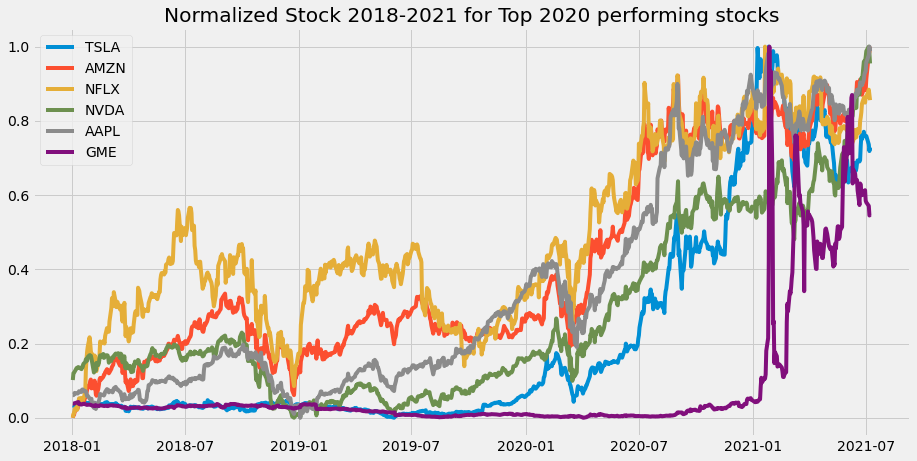

In [814]:
plot_stocks(df=s_close, year=year, periods=periods, title=f'Normalized Stock {year}-2021 for Top 2020 performing stocks')

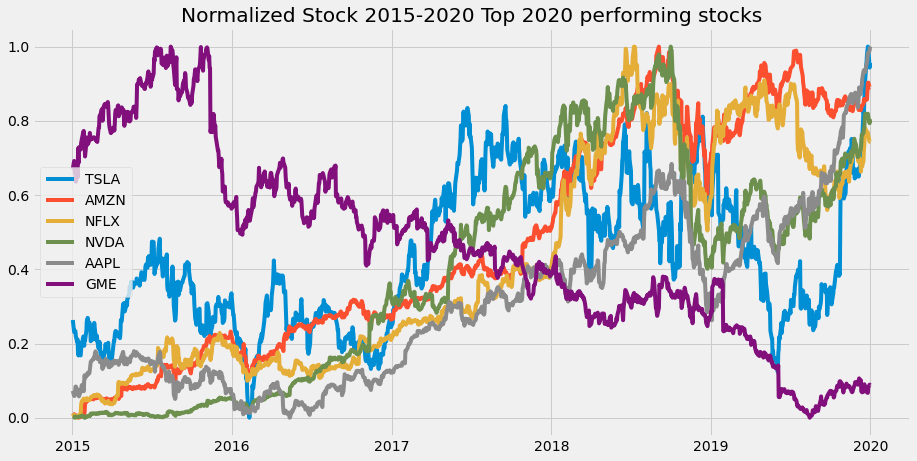

In [815]:
plot_stocks(df=s_close, year=2015, periods=4, title='Normalized Stock 2015-2020 Top 2020 performing stocks')

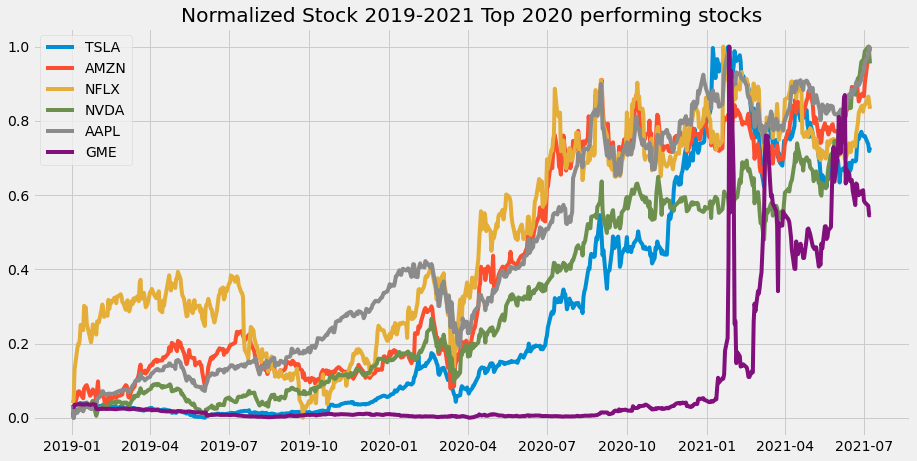

In [816]:
plot_stocks(df=s_close, year=2019, periods=2, title='Normalized Stock 2019-2021 Top 2020 performing stocks')

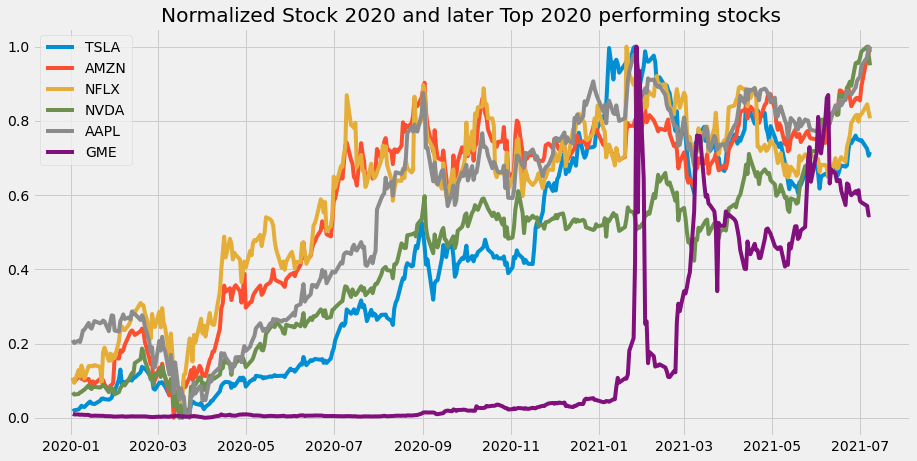

In [817]:
plot_stocks(df=s_close, year=2020, periods=2, title='Normalized Stock 2020 and later Top 2020 performing stocks')

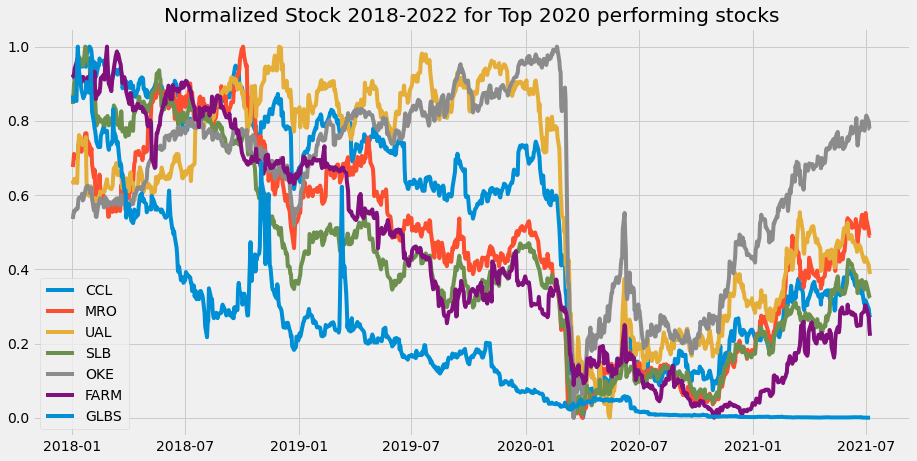

In [818]:
plot_stocks(df=p_close, year=year, periods=periods, title=f'Normalized Stock {year}-{year+periods} for Top 2020 performing stocks')

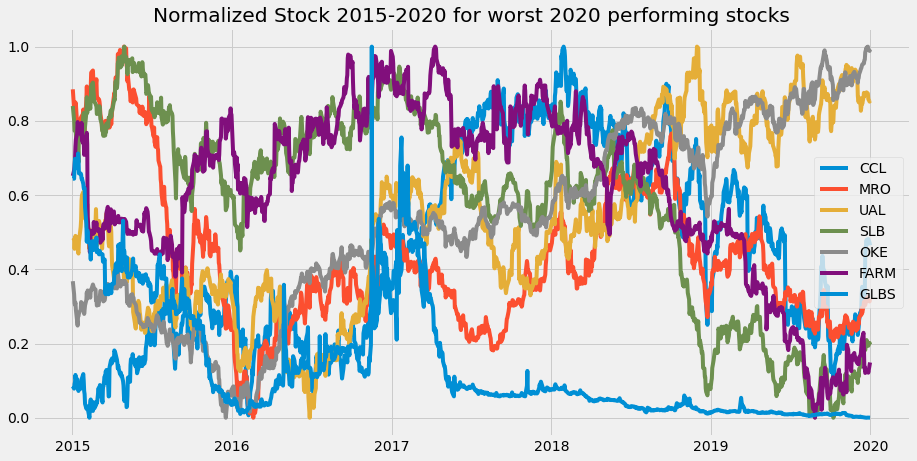

In [819]:
plot_stocks(df=p_close, year=2015, periods=4, title='Normalized Stock 2015-2020 for worst 2020 performing stocks')

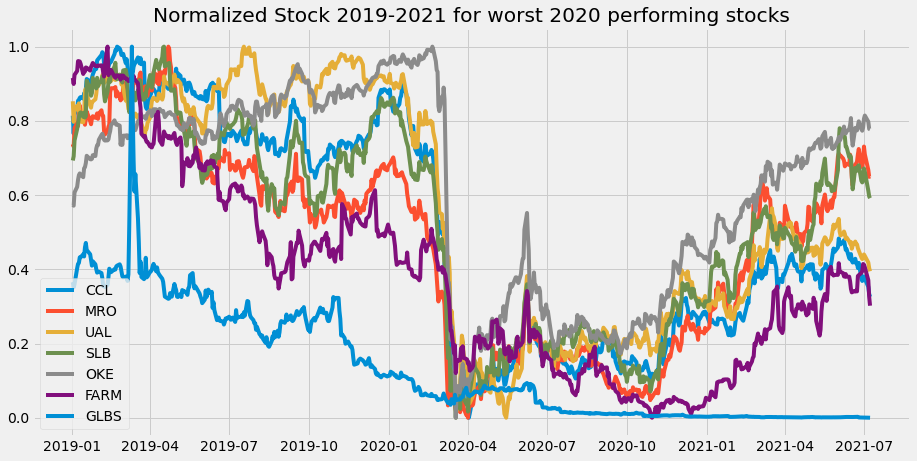

In [820]:
plot_stocks(df=p_close, year=2019, periods=2, title='Normalized Stock 2019-2021 for worst 2020 performing stocks')

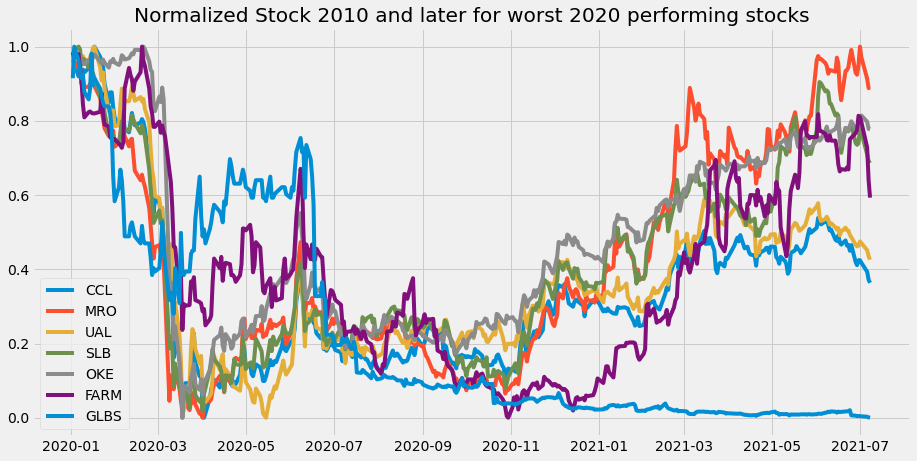

In [821]:
plot_stocks(df=p_close, year=2020, periods=2, title='Normalized Stock 2010 and later for worst 2020 performing stocks')

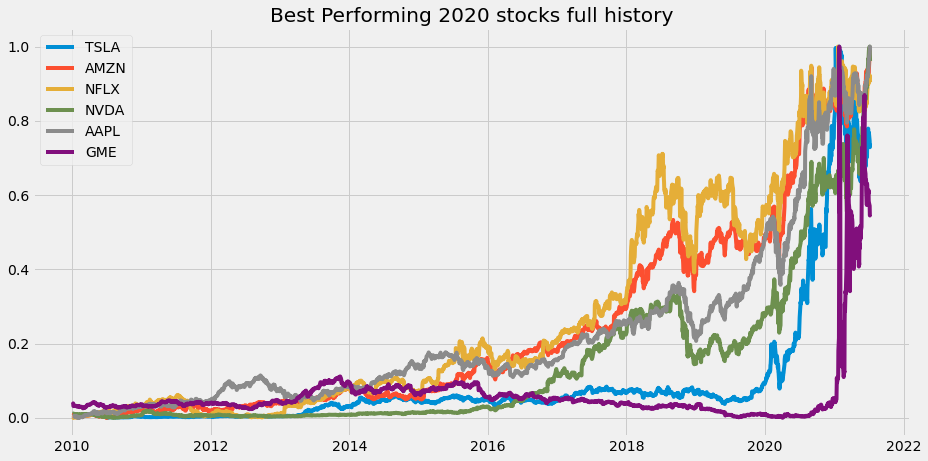

In [822]:
plot_stocks(df=s_close, year=2010, periods=11, title='Best Performing 2020 stocks full history')

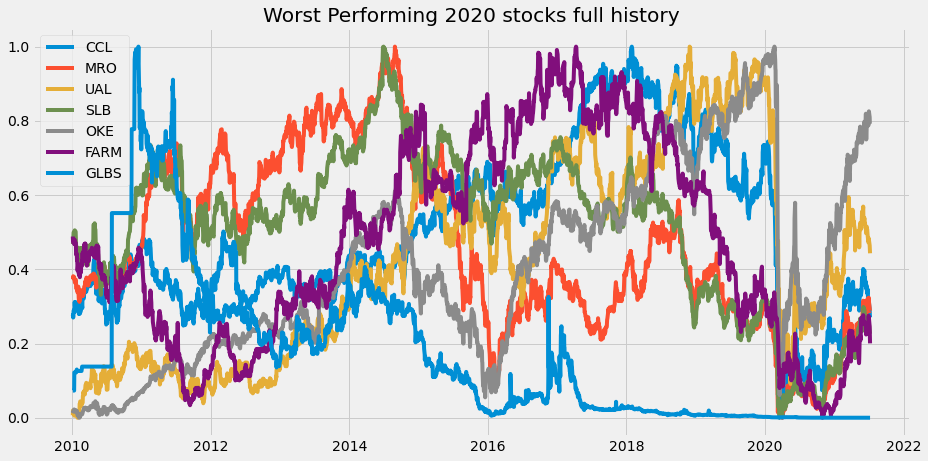

In [823]:
plot_stocks(df=p_close, year=2010, periods=11, title='Worst Performing 2020 stocks full history')

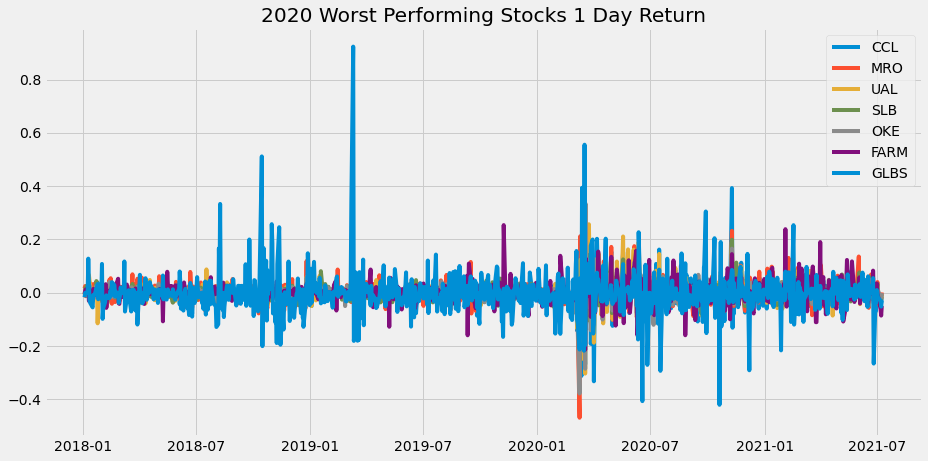

In [31]:
plot_stocks(df=p_close, year=year, periods=11, lag=1, title='2020 Worst Performing Stocks 1 Day Return')

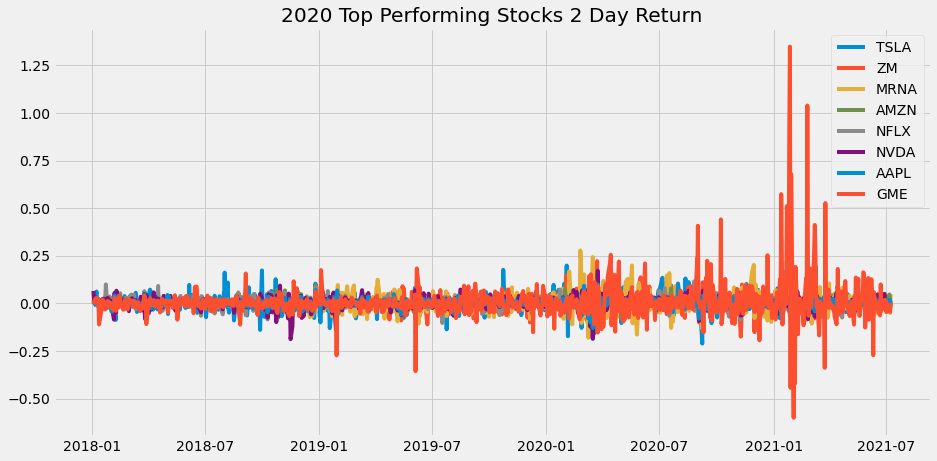

In [32]:
plot_stocks(df=s_close, year=year, periods=11, lag=1, title='2020 Top Performing Stocks 2 Day Return')

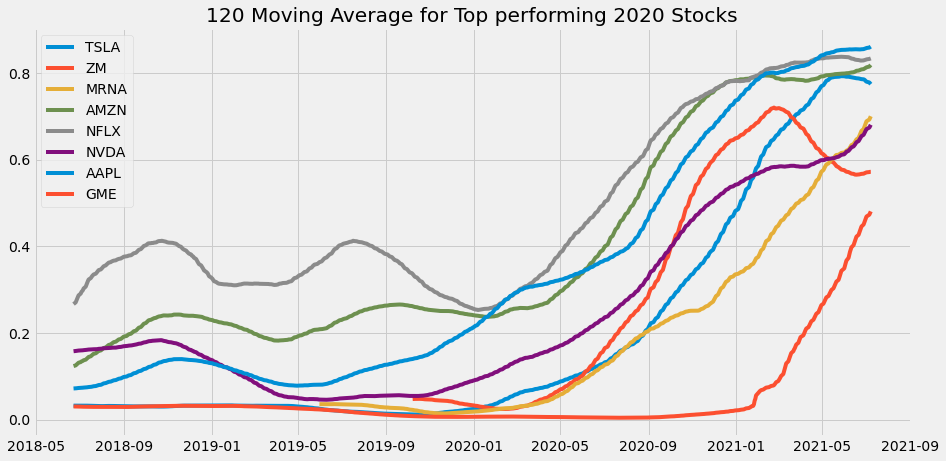

In [33]:
plot_stocks(df=s_close, year=year, periods=11, window=120, title='120 Moving Average for Top performing 2020 Stocks')

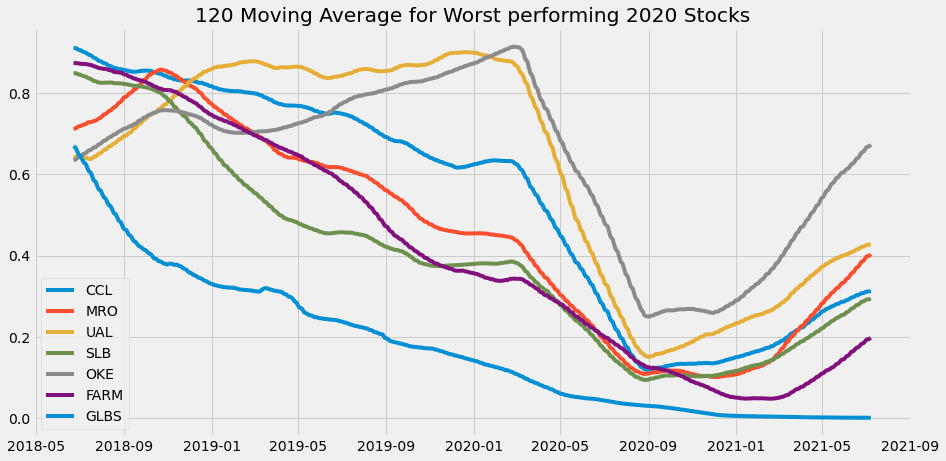

In [824]:
plot_stocks(df=p_close, year=year, periods=11, window=120, title='120 Moving Average for Worst performing 2020 Stocks')

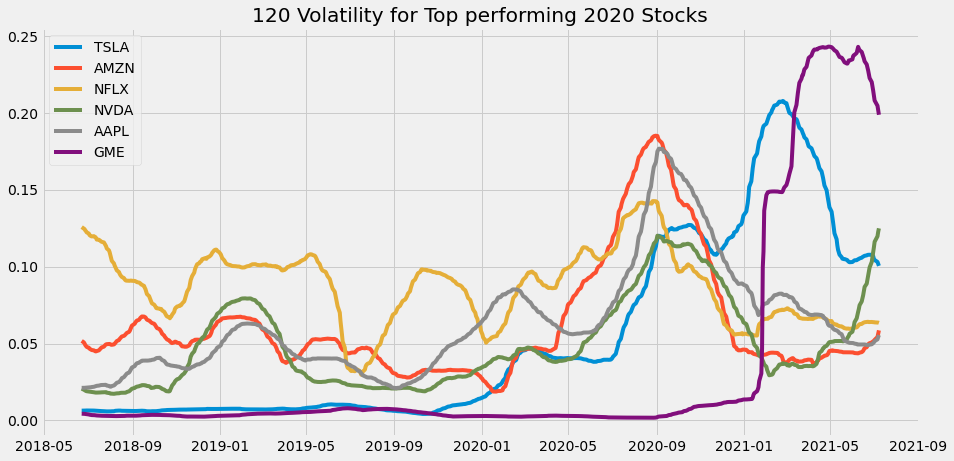

In [825]:
plot_stocks(df=s_close, year=year, periods=11, window=120, volatility=True, title='120 Volatility for Top performing 2020 Stocks')

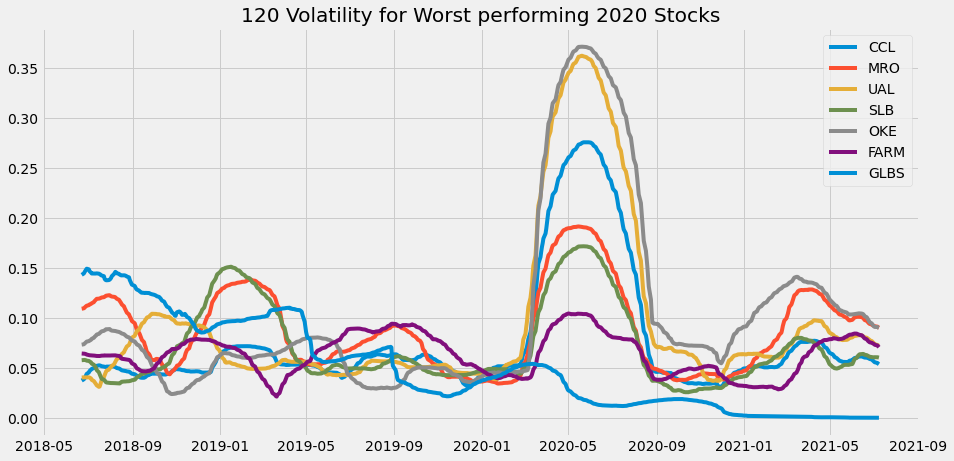

In [826]:
plot_stocks(df=p_close, year=year, periods=periods, window=120, volatility=True, title='120 Volatility for Worst performing 2020 Stocks')

# 4. Simulation with Monte Carlo (Experimentation)
* Monte Carlo GBM Simulation

In [827]:
df_all.shape

(2776, 6)

In [828]:
df_all.head(1)

TSLA    AMZN       NFLX      NVDA      AAPL      GME
date                                                             
2010-06-29  4.778  108.61  16.082841  9.631125  7.866247  12.3078

In [829]:
df_all.tail(1)

TSLA     AMZN    NFLX    NVDA    AAPL     GME
date                                                       
2021-07-08  652.81  3731.41  530.76  796.11  143.24  191.38

In [39]:
#df_all = pd.concat([i[1].rename(columns={'close':i[0]}) for i in s_close], axis=1).dropna()
df_all = pd.concat([i[1].rename(columns={'close':i[0]}) for i in s_close if i[0] not in ['ZM', 'MRNA']], axis=1).dropna()

# Monte Carlo Simulations and GBM 

Stochastic Differential Equation (SDE) for geometric Brownian motion:

$$ \Large S_t = S_{t-1}e^{(r-\sigma^2 / 2)t+\sigma W_t} $$





In [47]:
df_all.columns

Index(['TSLA', 'AMZN', 'NFLX', 'NVDA', 'AAPL', 'GME'], dtype='object')

In [48]:
def stock_price_simulation(df, weights):
    annual_vol = (df/df.shift(1)-1)[1:].std()*np.sqrt(252).tolist()
    mu = df.pct_change().iloc[:-252].mean().tolist()
    sigma = df.pct_change().iloc[:-252].std().tolist()
    last_prices = df[-1:].values.tolist()[0]
    T = 1.0
    N=500
    delta_t = T/N
    iterations = 1000
    time_steps = T/delta_t
    price = pd.DataFrame()
    
    for j in range(iterations):
        sim = [[p] for p in last_prices]
        for s in range(len(last_prices)):
            St = sim[s][0]
            for i in range(int(time_steps)):
                St = sim[s][-1]*np.exp((mu[s]-0.5*sigma[s]**2)*delta_t + sigma[s]*np.sqrt(delta_t)*np.random.normal(0, 1))
                sim[s].append(St)
            df = (pd.DataFrame(sim).T.pct_change()).dot(weights)
        price[j] = (1+df.fillna(0)).cumprod()
    return price 

## Simulate a porfolio of stocks with weights

### Experiment 1: All stocks ['TSLA', 'ZM', 'MRNA', 'AMZN', 'NFLX', 'NVDA', 'AAPL', 'GME'] with weights [0.05, 0.05, 0.05, 0.25, 0.15, 0.175, 0.25, 0.025]

In [45]:
all_strong = stock_price_simulation(df_all, weights=[0.05, 0.05, 0.05, 0.25, 0.15, 0.175, 0.25, 0.025])   

<AxesSubplot:>

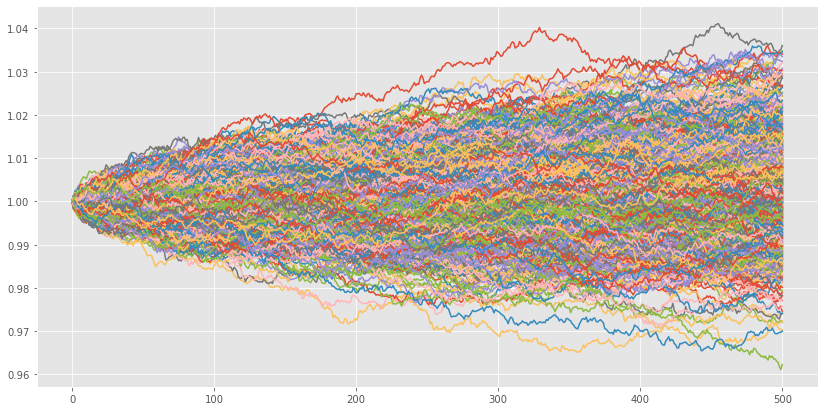

In [856]:
all_strong.plot(legend=False, title=f'Simulated Trade {df_all.columns}')

In [857]:
confidence_interval = all_strong.iloc[-1, :].quantile(q=[0.025, 0.975])
metrics = all_strong.iloc[-1].describe()
ci_series = confidence_interval
ci_series.index = ["95% CI Lower","95% CI Upper"]
all_metrics = metrics.append(ci_series)
all_metrics

count           1000.000000
mean               1.002764
std                0.011153
min                0.962281
25%                0.995096
50%                1.002834
75%                1.010183
max                1.036047
95% CI Lower       0.981868
95% CI Upper       1.024969
Name: 500, dtype: float64

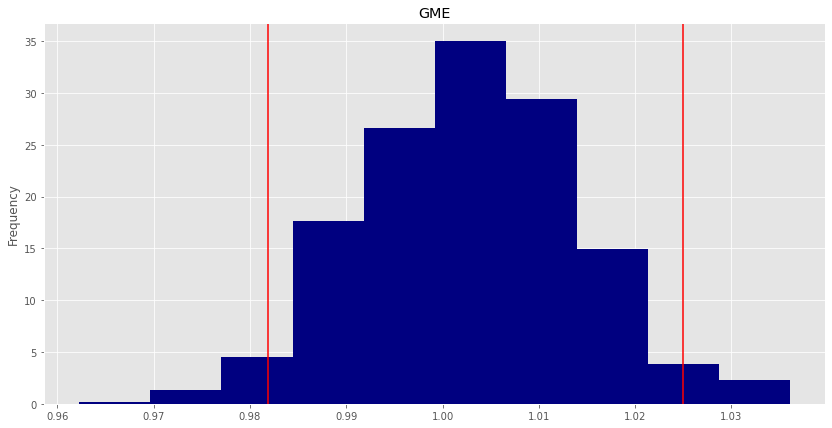

In [858]:
all_strong.iloc[-1, :].plot(kind='hist', bins=10,density=True, color='navy', title='Portfolio of all Strong Performers')
plt.axvline(all_metrics[8], color='r')
plt.axvline(all_metrics[9], color='r')
plt.show()

In [859]:
ci_lower = round(all_metrics[8]*1000,2)
ci_upper = round(all_metrics[9]*1000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $1,000 in "
        f" over the next 3 years will end within in the range of"
        f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $1,000 in  over the next 3 years will end within in the range of $981.87 and $1024.97.


### Experiment 2: ['AAPL', 'AMZN'] porfolio with 50/50 split

In [865]:
amz_aapl = stock_price_simulation(df_all[['AAPL', 'AMZN']], [0.5, 0.5])  

<AxesSubplot:>

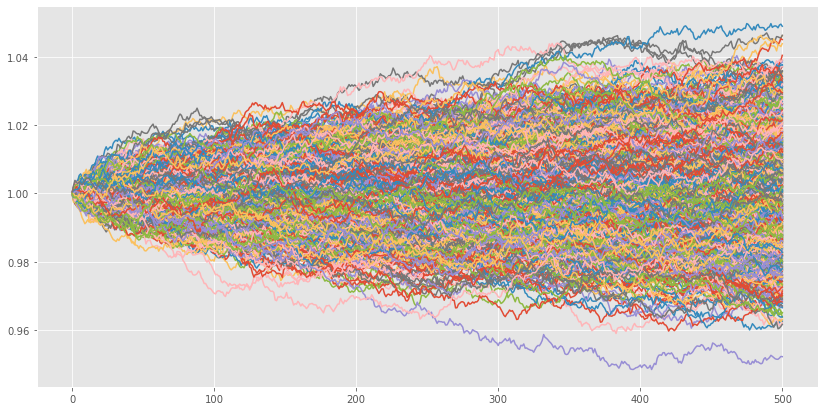

In [866]:
amz_aapl.plot(legend=False, title='Simulated Trade AAPL and AMZN')

In [867]:
confidence_interval = amz_aapl.iloc[-1, :].quantile(q=[0.025, 0.975])
metrics = price_path.iloc[-1].describe()
ci_series = confidence_interval
ci_series.index = ["95% CI Lower","95% CI Upper"]
amz_aapl_metrics = metrics.append(ci_series)
amz_aapl_metrics

count           1000.000000
mean               1.001459
std                0.015800
min                0.952239
25%                0.990259
50%                1.001763
75%                1.012106
max                1.048948
95% CI Lower       0.971198
95% CI Upper       1.032735
Name: 500, dtype: float64

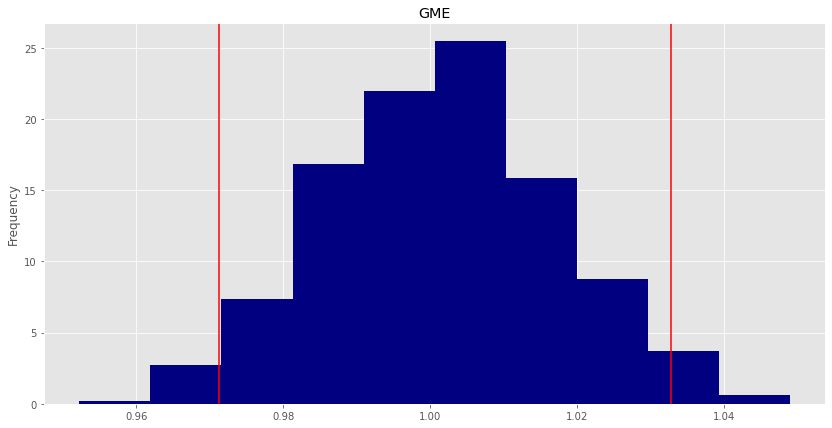

In [868]:
amz_aapl.iloc[-1, :].plot(kind='hist', bins=10,density=True, color='navy', title='Porfolio 50/50 AAPL & AMZN')
plt.axvline(amz_aapl_metrics[8], color='r')
plt.axvline(amz_aapl_metrics[9], color='r')
plt.show()

In [869]:
ci_lower = round(amz_aapl_metrics[8]*1000,2)
ci_upper = round(amz_aapl_metrics[9]*1000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $1,000 in "
        f" over the next 3 years will end within in the range of"
        f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $1,000 in  over the next 3 years will end within in the range of $971.2 and $1032.74.


### Experiment 3: Low performing stocks porftolio ['FARM', 'GLBS'] with 50/50 split

In [51]:
df_all_p = pd.concat([i[1].rename(columns={'close':i[0]}) for i in p_close], axis=1).dropna()

In [52]:
df_all_p.columns

Index(['CCL', 'MRO', 'UAL', 'SLB', 'OKE', 'FARM', 'GLBS'], dtype='object')

<AxesSubplot:>

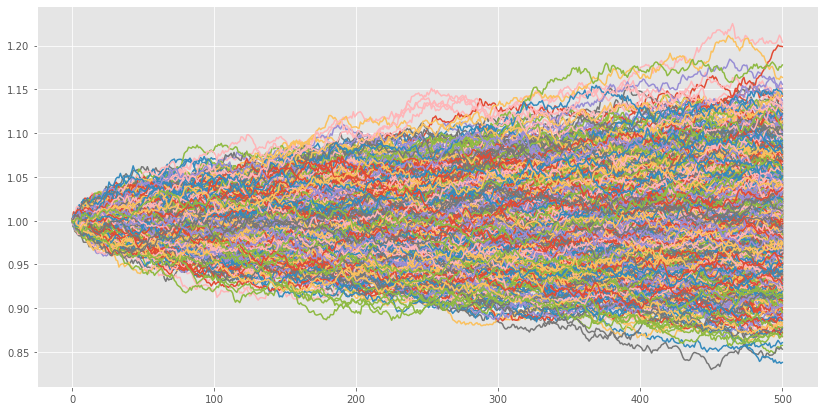

In [876]:
weak_ps = stock_price_simulation(df_all_p[['FARM', 'GLBS']], [0.5, 0.5])  
weak_ps.plot(legend=False, title='Simulated Trade FARM & GLBS')

In [877]:
confidence_interval = weak_ps.iloc[-1, :].quantile(q=[0.025, 0.975])
metrics = price_path.iloc[-1].describe()
ci_series = confidence_interval
ci_series.index = ["95% CI Lower","95% CI Upper"]
weak_ps_metrics = metrics.append(ci_series)
weak_ps_metrics

count           1000.000000
mean               1.003027
std                0.056792
min                0.837997
25%                0.964407
50%                1.002566
75%                1.041367
max                1.203717
95% CI Lower       0.891645
95% CI Upper       1.120202
Name: 500, dtype: float64

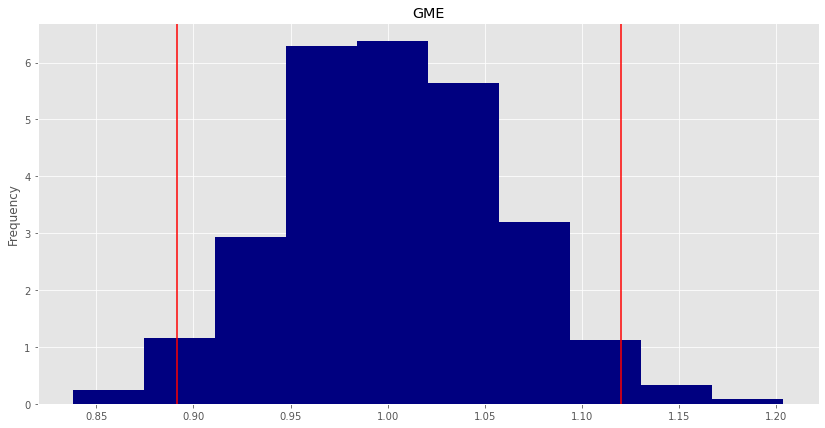

In [878]:
weak_ps.iloc[-1, :].plot(kind='hist', bins=10,density=True, color='navy', title= "Porfolio 50/50 FARM & GLBS")
plt.axvline(weak_ps_metrics[8], color='r')
plt.axvline(weak_ps_metrics[9], color='r')
plt.show()

In [879]:
ci_lower = round(weak_ps_metrics[8]*1000,2)
ci_upper = round(weak_ps_metrics[9]*1000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $1,000 in "
        f" over the next 3 years will end within in the range of"
        f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $1,000 in  over the next 3 years will end within in the range of $891.64 and $1120.2.


# 5. Creating Features

In [49]:
porfolio = ['TSLA', 'AAPL', 'NFLX']
weights = [0.33, 0.33, 0.33]

In [53]:
stocks_combined = pd.concat([df_all, df_all_p], join='inner', axis=1)

In [54]:
stocks_combined.columns

Index(['TSLA', 'AMZN', 'NFLX', 'NVDA', 'AAPL', 'GME', 'CCL', 'MRO', 'UAL',
       'SLB', 'OKE', 'FARM', 'GLBS'],
      dtype='object')

In [56]:
porfolio_df = stocks_combined[porfolio]

In [57]:
wt_returns = porfolio_df.pct_change().dropna() * weights

In [58]:
wt_returns.sum(axis=1)

date
2010-06-30   -0.018326
2010-07-01   -0.026830
2010-07-02   -0.051285
2010-07-06   -0.050265
2010-07-07    0.041486
                ...   
2021-07-01    0.003213
2021-07-02    0.007216
2021-07-06    0.000200
2021-07-07   -0.005005
2021-07-08   -0.002060
Length: 2775, dtype: float64

In [59]:
porfolio_df['total'] = (porfolio_df*weights).sum(axis=1)
porfolio_df

<ipython-input-59-4a9c685bfff8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  porfolio_df['total'] = (porfolio_df*weights).sum(axis=1)


TSLA        AAPL        NFLX       total
date                                                   
2010-06-29    4.778    7.866247   16.082841    9.479939
2010-06-30    4.766    7.723766   15.521413    9.243689
2010-07-01    4.392    7.630109   15.665699    9.136977
2010-07-02    3.840    7.582820   15.297128    8.817583
2010-07-06    3.222    7.634715   15.324270    8.639725
...             ...         ...         ...         ...
2021-07-01  677.920  137.270000  533.540000  445.080900
2021-07-02  678.900  139.960000  533.980000  446.437200
2021-07-06  659.580  142.020000  541.640000  443.269200
2021-07-07  644.650  144.570000  535.960000  437.309400
2021-07-08  652.810  143.240000  530.760000  437.847300

[2776 rows x 4 columns]

In [60]:
wt_returns = porfolio_df.pct_change()['total'].dropna()

<AxesSubplot:xlabel='date'>

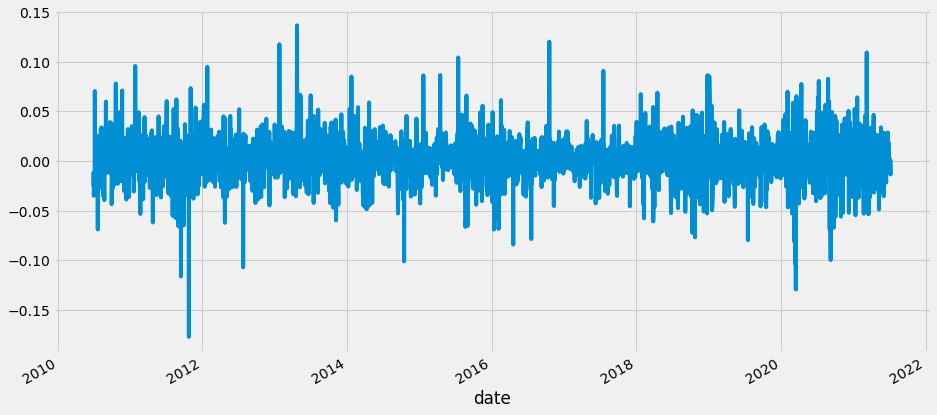

In [61]:
wt_returns.plot()

### Optimize Porfolio Weights

In [62]:
stocks_combined

TSLA     AMZN        NFLX        NVDA        AAPL         GME  \
date                                                                           
2010-06-29    4.778   108.61   16.082841    9.631125    7.866247   12.307800   
2010-06-30    4.766   109.26   15.521413    9.382995    7.723766   12.623557   
2010-07-01    4.392   110.96   15.665699    9.539225    7.630109   12.811668   
2010-07-02    3.840   109.14   15.297128    9.419755    7.582820   12.274209   
2010-07-06    3.222   110.06   15.324270    9.318665    7.634715   12.361546   
...             ...      ...         ...         ...         ...         ...   
2021-07-01  677.920  3432.97  533.540000  808.480000  137.270000  204.360000   
2021-07-02  678.900  3510.98  533.980000  819.480000  139.960000  202.830000   
2021-07-06  659.580  3675.74  541.640000  827.940000  142.020000  199.560000   
2021-07-07  644.650  3696.58  535.960000  814.870000  144.570000  190.660000   
2021-07-08  652.810  3731.41  530.760000  796.110000  143.240000  191.380000   

                  CCL        MRO    UAL        SLB        OKE       FARM  \
date                                                                       
2010-06-29  22.587764  15.675627  19.99  41.777201  10.683613  14.615674   
2010-06-30  22.662707  15.535711  20.56  41.974407  10.573599  14.802049   
2010-07-01  23.464595  15.415783  20.72  41.913728  10.397576  14.439109   
2010-07-02  22.947490  15.405789  18.59  41.686184  10.338902  14.311590   
2010-07-06  22.850064  15.495735  18.64  42.126103  10.475809  14.488155   
...               ...        ...    ...        ...        ...        ...   
2021-07-01  26.360000  14.170000  53.08  33.070000  56.930000  12.650000   
2021-07-02  26.060000  13.850000  52.77  32.790000  57.390000  12.490000   
2021-07-06  25.020000  13.210000  51.44  31.170000  56.490000  11.720000   
2021-07-07  24.080000  12.930000  50.30  30.680000  55.440000  10.720000   
2021-07-08  23.720000  12.950000  49.66  30.530000  55.380000  10.190000   

                   GLBS  
date                     
2010-06-29  6022.279647  
2010-06-30  6022.279647  
2010-07-01  6022.279647  
2010-07-02  6022.279647  
2010-07-06  6022.279647  
...                 ...  
2021-07-01     3.860000  
2021-07-02     3.790000  
2021-07-06     3.680000  
2021-07-07     3.490000  
2021-07-08     3.390000  

[2776 rows x 13 columns]

<AxesSubplot:xlabel='date'>

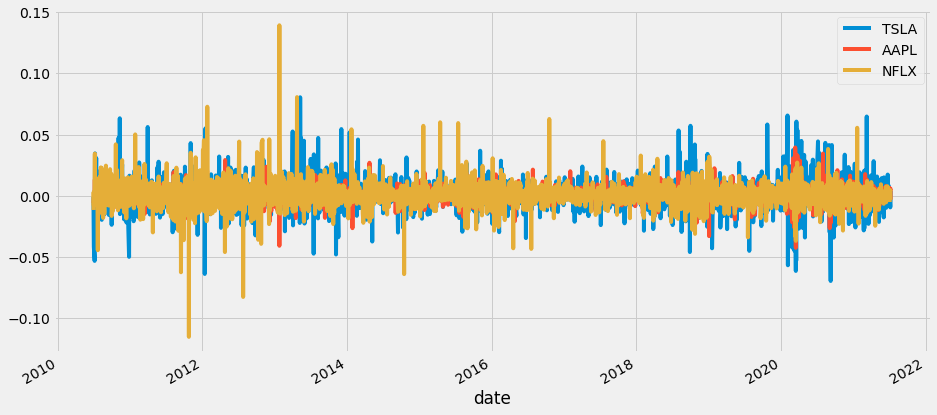

In [64]:
(stocks_combined[porfolio].pct_change() * weights).plot()

<AxesSubplot:xlabel='date'>

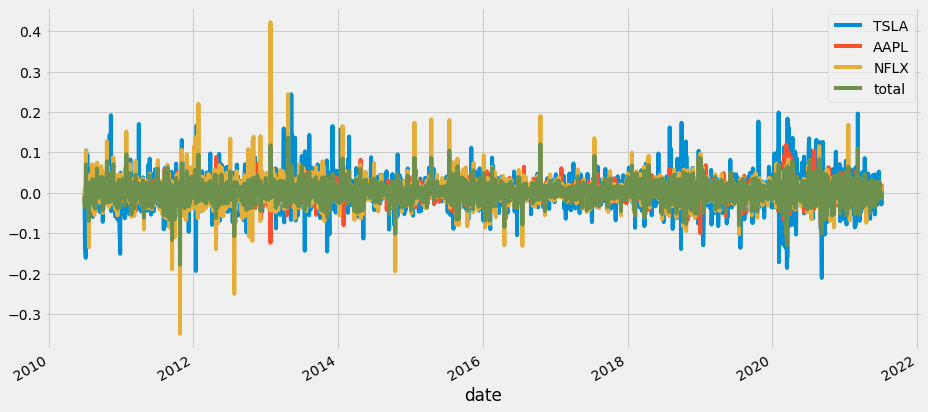

In [65]:
porfolio_df.pct_change().plot()

# 6. Time Series Analysis

In [66]:
from IPython.display import Markdown, display_markdown
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [67]:
# %whos

In [68]:
df_all

TSLA     AMZN        NFLX        NVDA        AAPL         GME
date                                                                        
2010-06-29    4.778   108.61   16.082841    9.631125    7.866247   12.307800
2010-06-30    4.766   109.26   15.521413    9.382995    7.723766   12.623557
2010-07-01    4.392   110.96   15.665699    9.539225    7.630109   12.811668
2010-07-02    3.840   109.14   15.297128    9.419755    7.582820   12.274209
2010-07-06    3.222   110.06   15.324270    9.318665    7.634715   12.361546
...             ...      ...         ...         ...         ...         ...
2021-07-01  677.920  3432.97  533.540000  808.480000  137.270000  204.360000
2021-07-02  678.900  3510.98  533.980000  819.480000  139.960000  202.830000
2021-07-06  659.580  3675.74  541.640000  827.940000  142.020000  199.560000
2021-07-07  644.650  3696.58  535.960000  814.870000  144.570000  190.660000
2021-07-08  652.810  3731.41  530.760000  796.110000  143.240000  191.380000

[2776 rows x 6 columns]

## ACF and PACF

#### TSLA

---

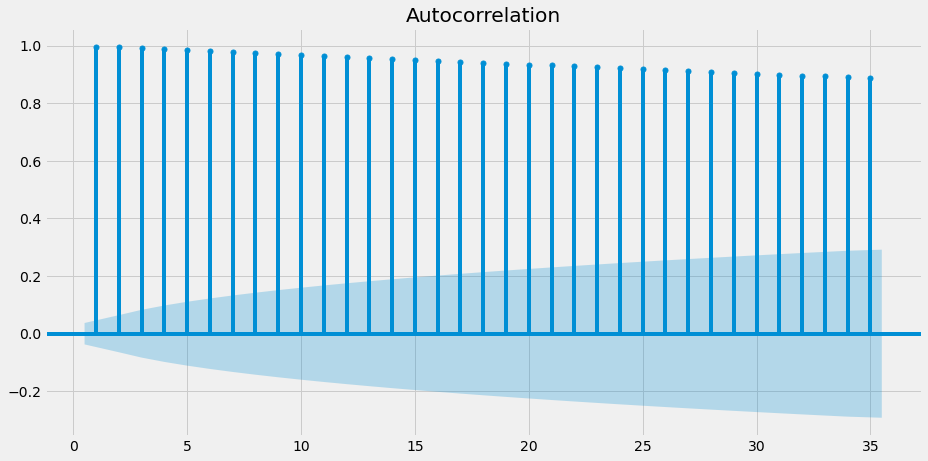

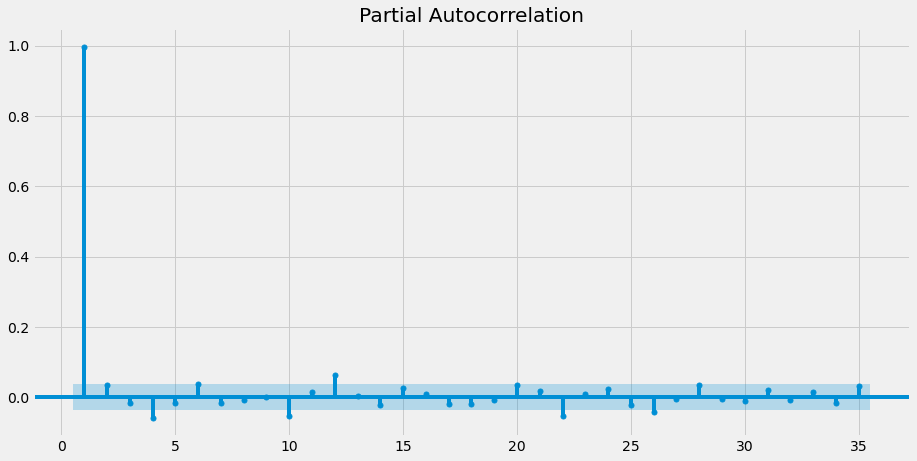

#### AMZN

---

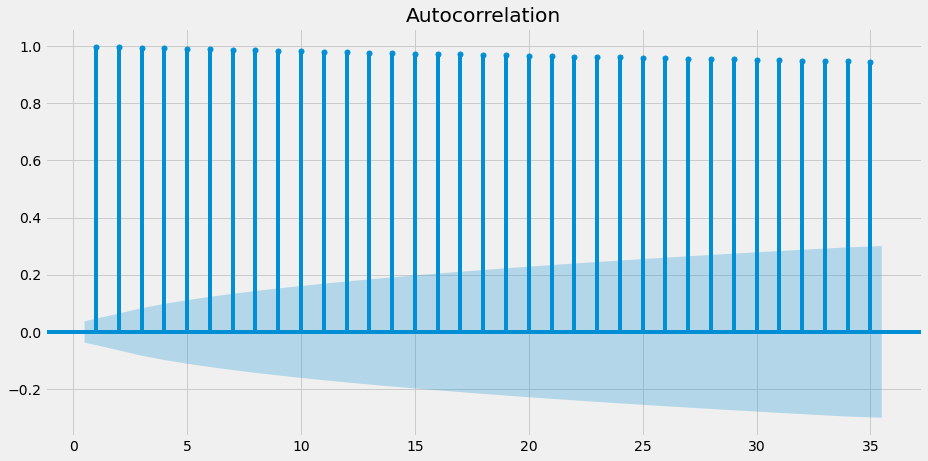

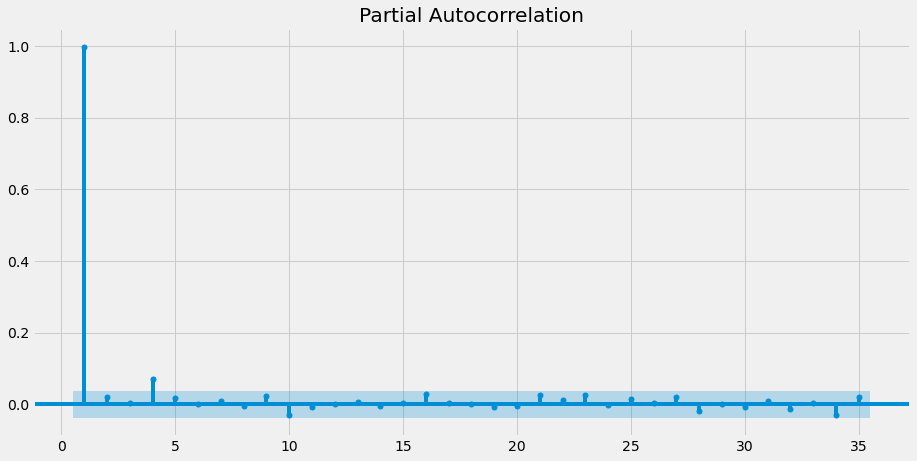

#### NFLX

---

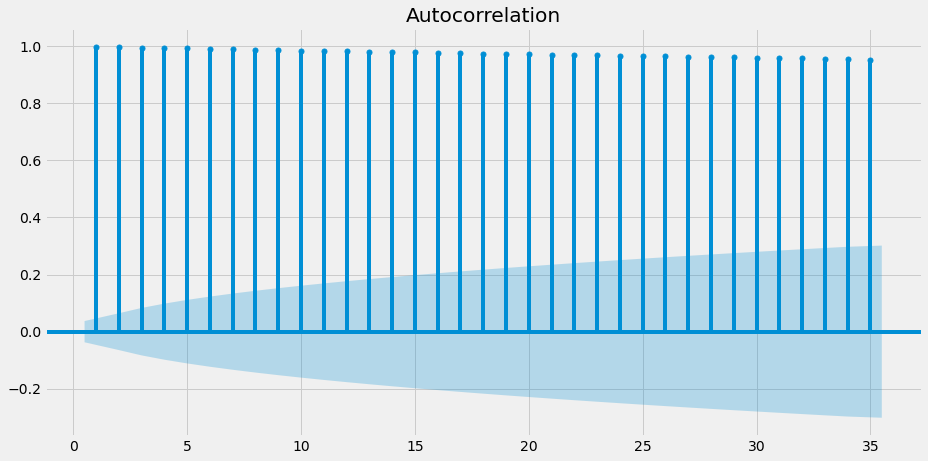

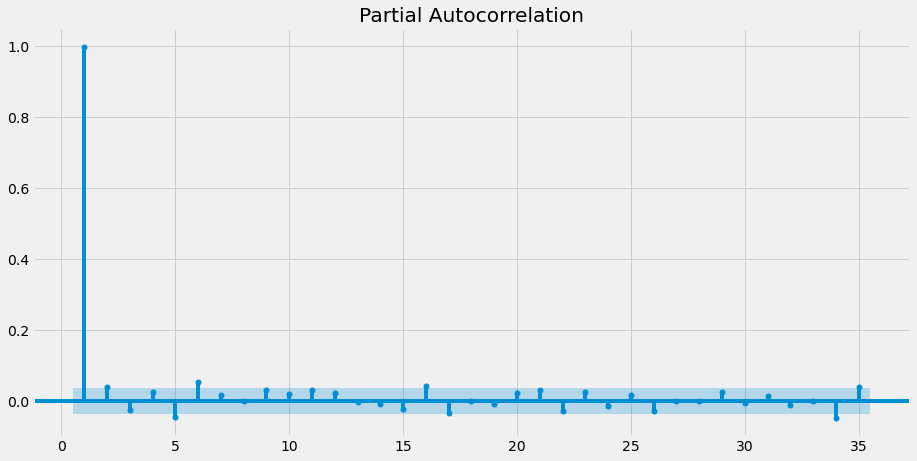

#### NVDA

---

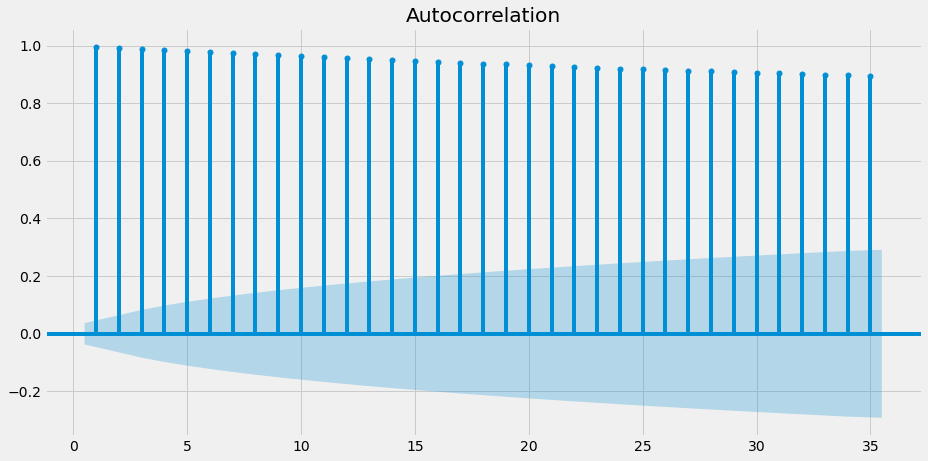

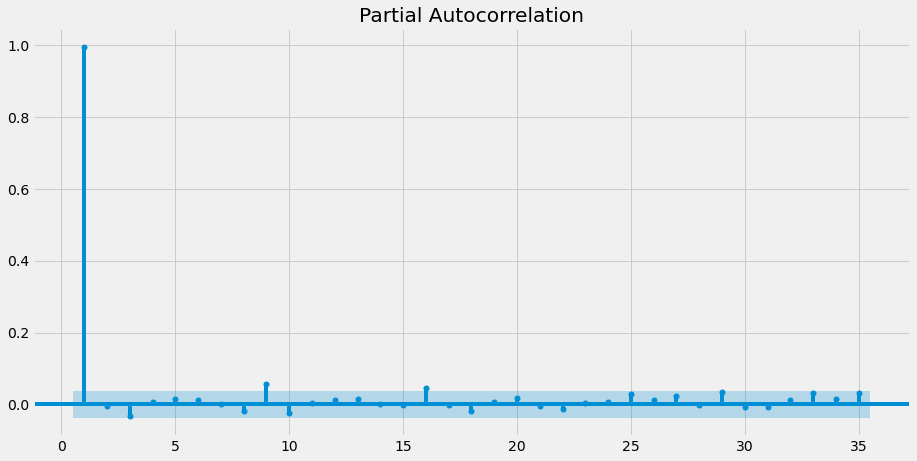

#### AAPL

---

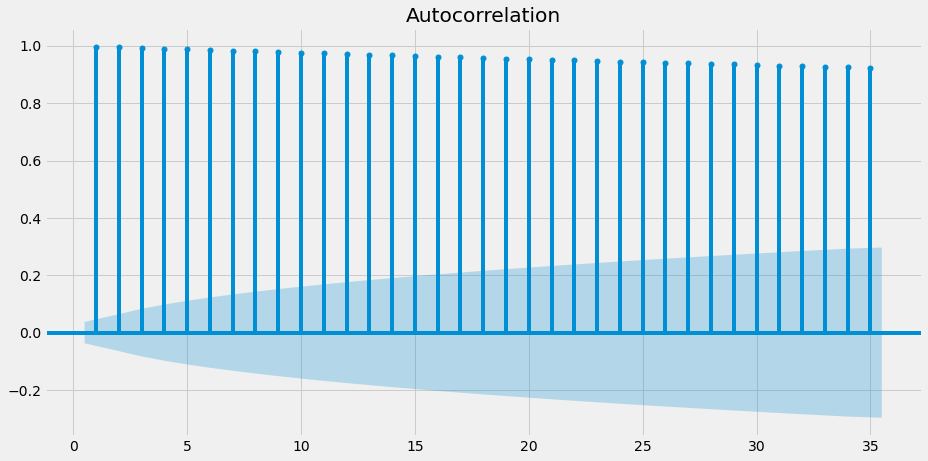

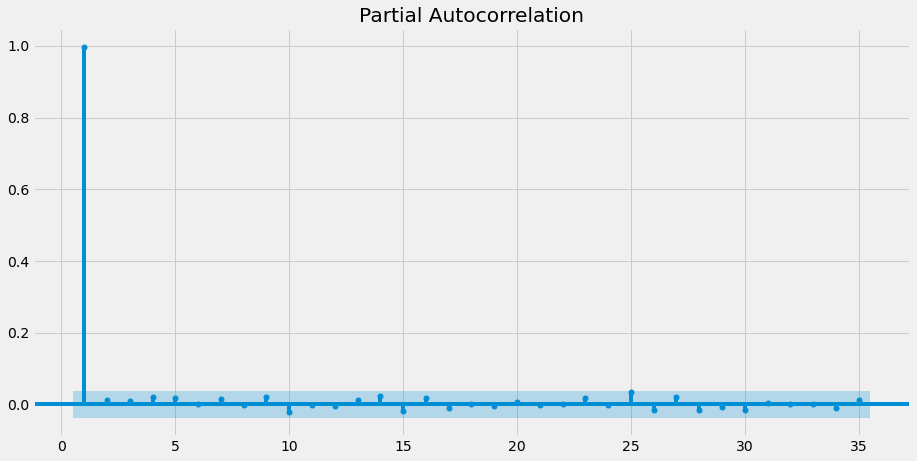

#### GME

---

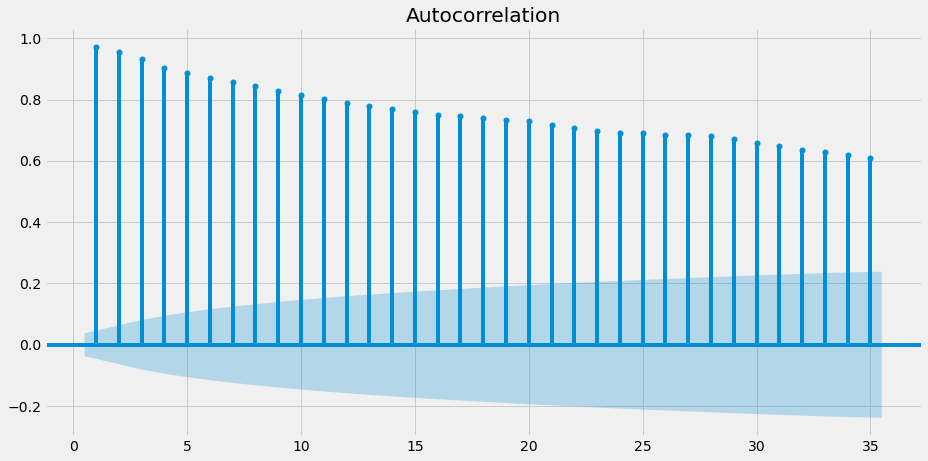

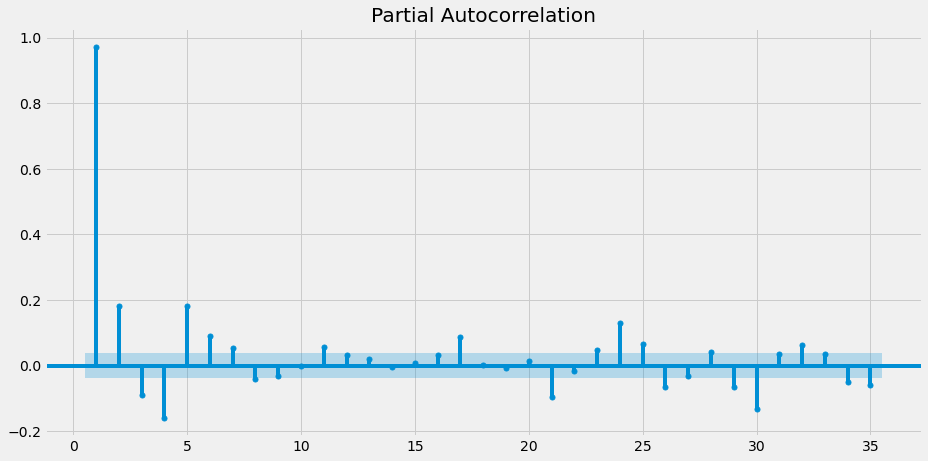

In [79]:
for symbol in df_all.columns:
    display(Markdown(f'#### {symbol}'))
    _ = plot_acf(df_all[symbol], zero=False, lags=35)
    _ = plot_pacf(df_all[symbol],  zero=False, lags=35)
    display(Markdown('---'))
    plt.show()

#### CCL

---

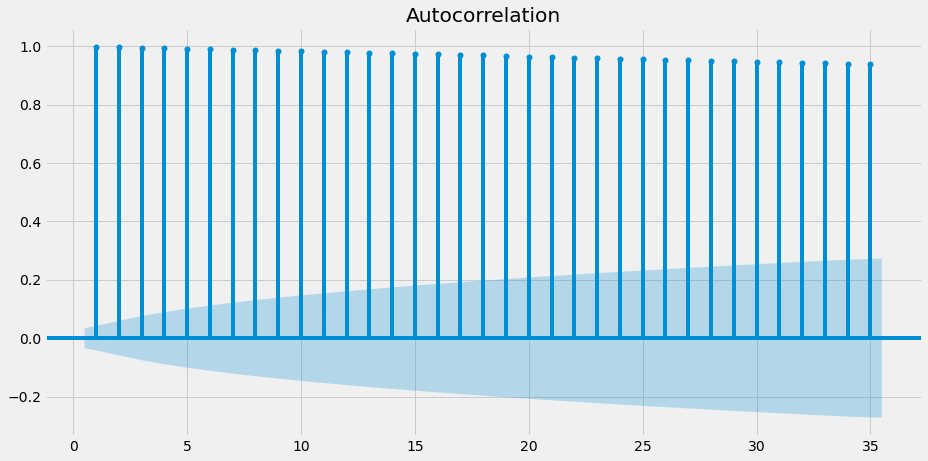

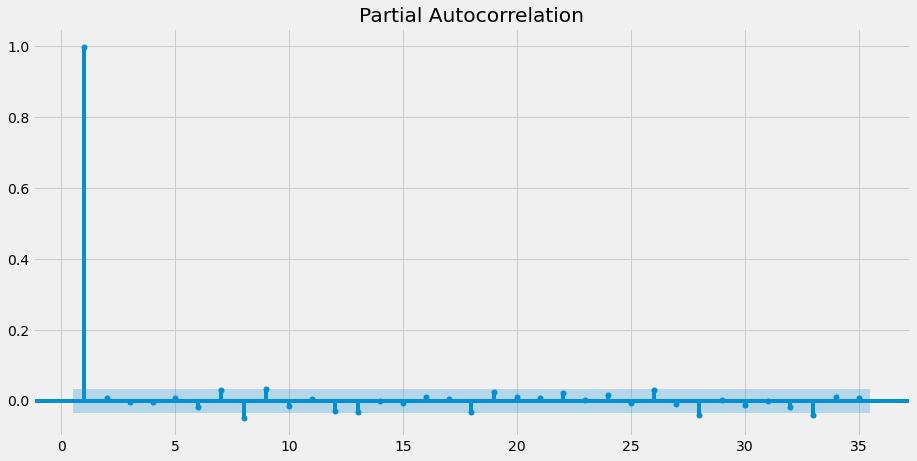

#### MRO

---

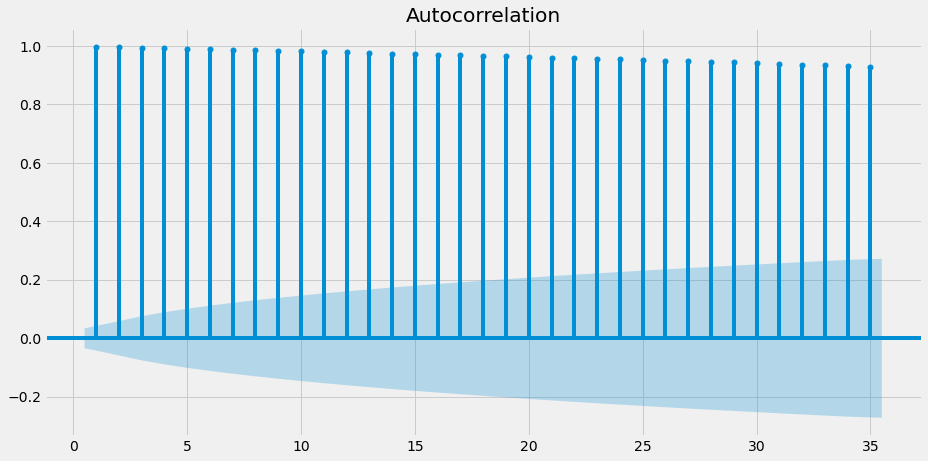

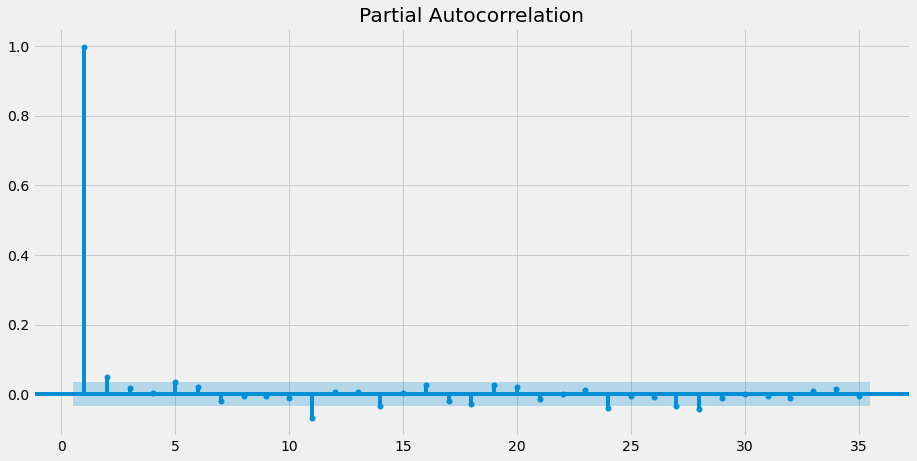

#### UAL

---

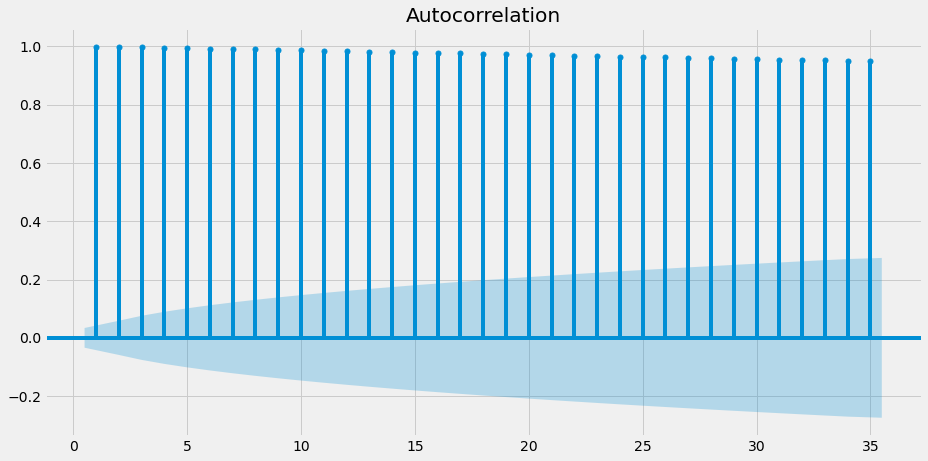

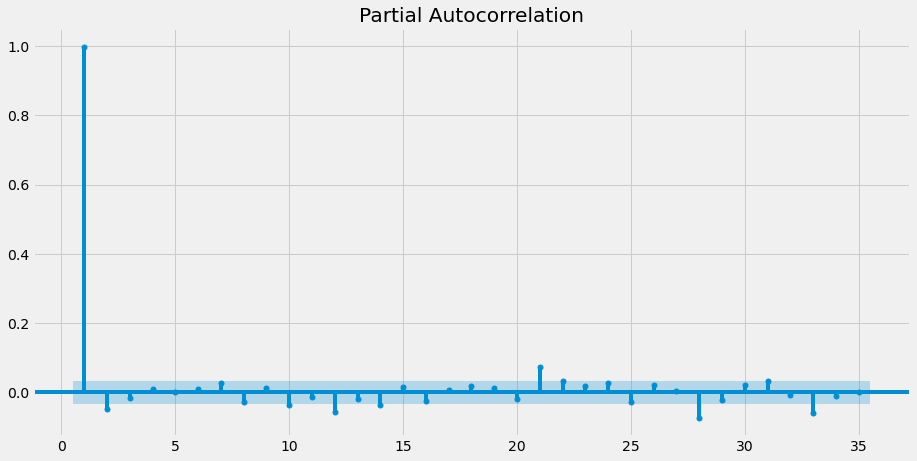

#### SLB

---

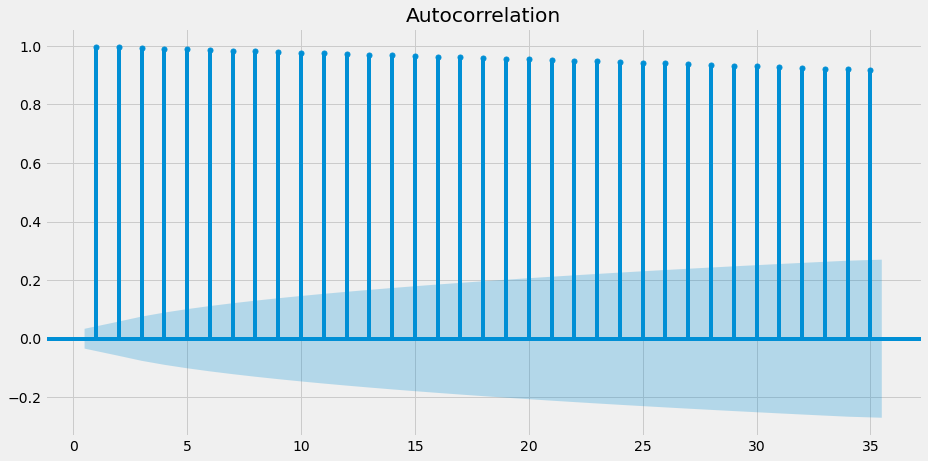

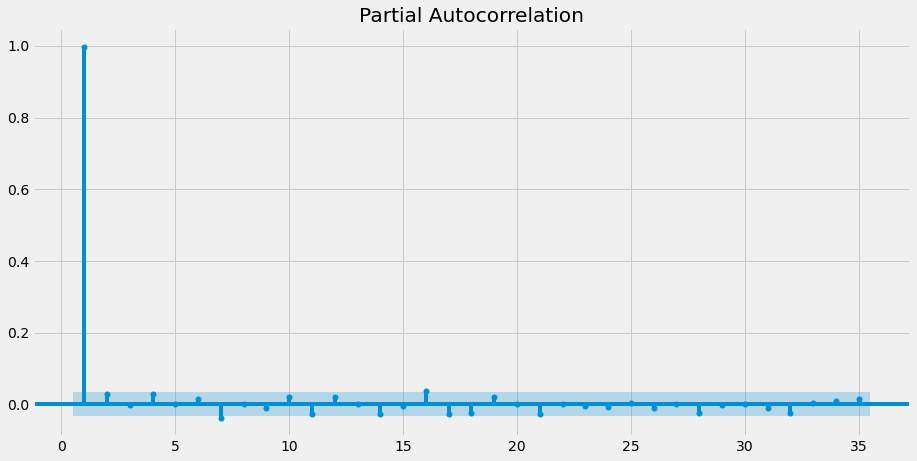

#### OKE

---

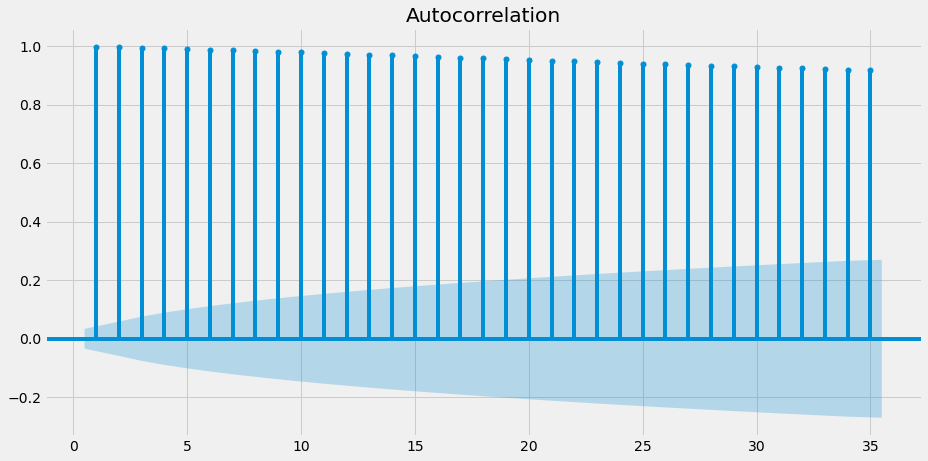

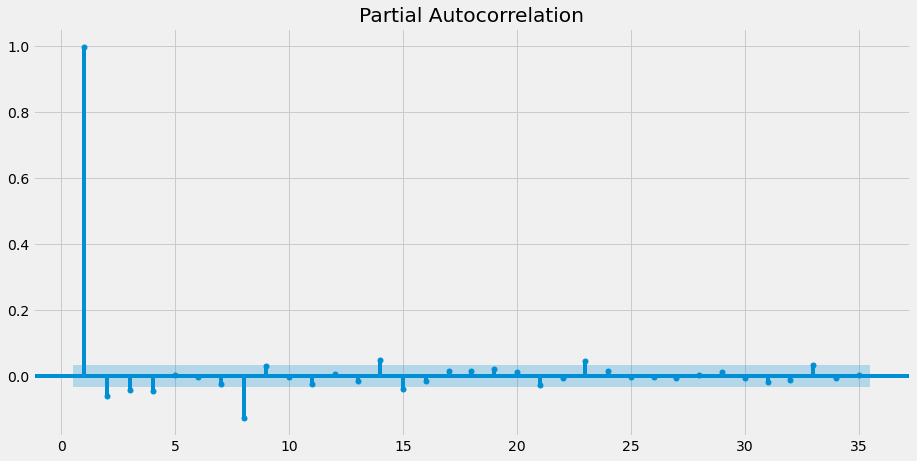

#### FARM

---

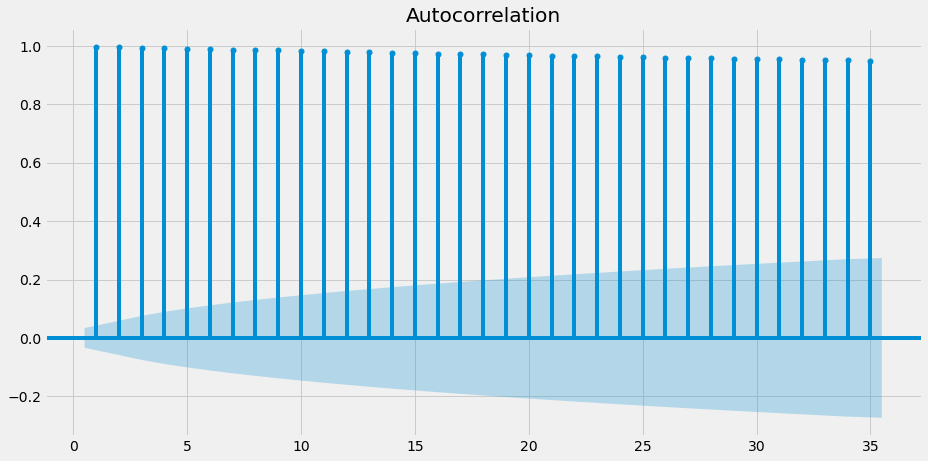

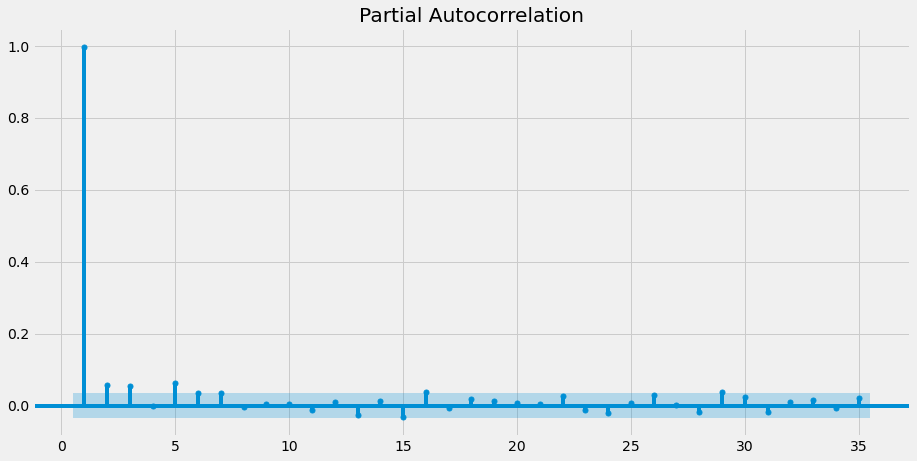

#### GLBS

---

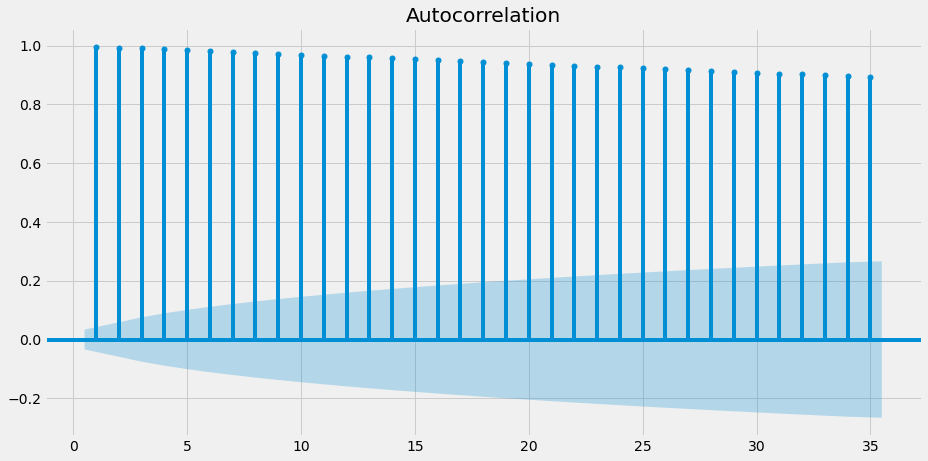

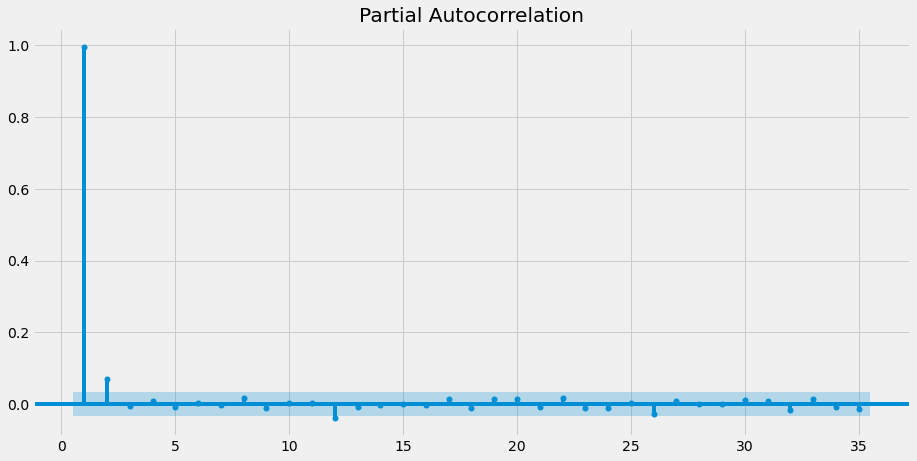

In [82]:
for symbol in df_all_p.columns:
    display(Markdown(f'#### {symbol}'))
    _ = plot_acf(df_all_p[symbol], zero=False, lags=35)
    _ = plot_pacf(df_all_p[symbol],  zero=False, lags=35)
    display(Markdown('---'))
    plt.show()

# 7. Time Series Forecasting: AutoRegressive Integrated Moving Average (ARIMA)

In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

## 1. Univariate: Experiment with ARIMA on AAPL

In [84]:
df_all['AAPL']

date
2010-06-29      7.866247
2010-06-30      7.723766
2010-07-01      7.630109
2010-07-02      7.582820
2010-07-06      7.634715
                 ...    
2021-07-01    137.270000
2021-07-02    139.960000
2021-07-06    142.020000
2021-07-07    144.570000
2021-07-08    143.240000
Name: AAPL, Length: 2776, dtype: float64

In [85]:
model = ARIMA(df_all['AAPL'].values, order=(1,1,1))
results = model.fit()

In [86]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2776
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3957.648
Date:                Mon, 02 Aug 2021   AIC                           7921.296
Time:                        17:46:30   BIC                           7939.081
Sample:                             0   HQIC                          7927.718
                               - 2776                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3857      0.058     -6.666      0.000      -0.499      -0.272
ma.L1          0.2823      0.060      4.670      0.000       0.164       0.401
sigma2         1.0146      0.008    127.867      0.000       0.999       1.030
===================================================================================
Ljung-Box (Q):                      170.32   Jarque-Bera (JB):             54764.49
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              44.05   Skew:                            -0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

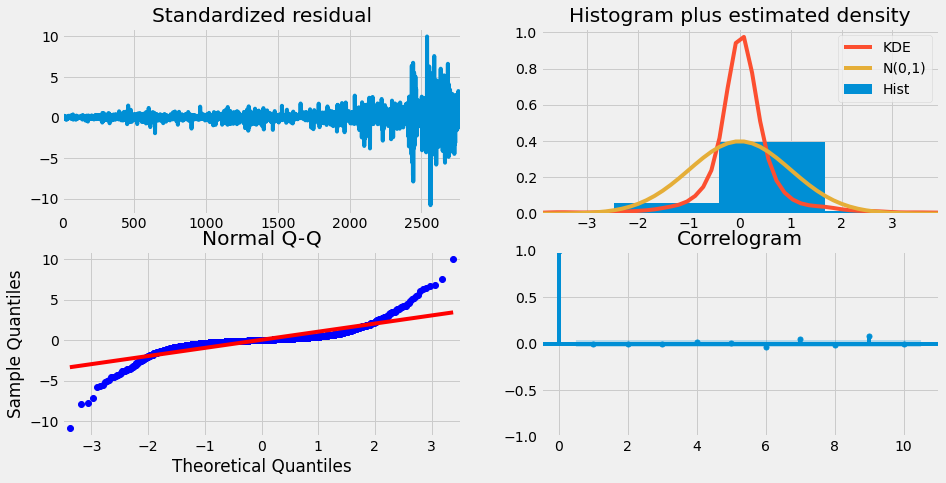

In [87]:
_ = results.plot_diagnostics()

#### First ARIMA Model (pre and during pandemic) - Can we predict early 2021

In [407]:
model = ARIMA(df_all.loc['2019':'2020']['AAPL'].values, order=(1,1,1))
results = model.fit()

In [408]:
df_all.loc['2021': '2021-01-15'].index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15'],
              dtype='datetime64[ns]', name='date', freq=None)

In [409]:
results.forecast(steps=11)

array([132.40699424, 132.356201  , 132.37475211, 132.36797672,
       132.37045128, 132.3695475 , 132.36987759, 132.36975703,
       132.36980106, 132.36978498, 132.36979086])

In [410]:
actual = df_all.loc['2020-12-31':'2021-01-15']['AAPL']
predicted = results.forecast(steps=11)

In [411]:
ARIMA_1_RMSE = np.sqrt(mean_squared_error(actual, predicted))
ARIMA_1_R2 = r2_score(actual, predicted)
ARIMA_1_MAPE = mean_absolute_percentage_error(actual, predicted)
ARIMA_1_AIC = results.aic
ARIMA_1_BIC = results.bic
print(f'RMSE : {ARIMA_1_RMSE}')
print(f'R2 : {ARIMA_1_R2}')
print(f'AIC : {ARIMA_1_AIC}')
print(f'BIC : {ARIMA_1_BIC}')

RMSE : 3.531295603542354
R2 : -2.707079066427085
AIC : 2079.6254489605417
BIC : 2092.293177764756


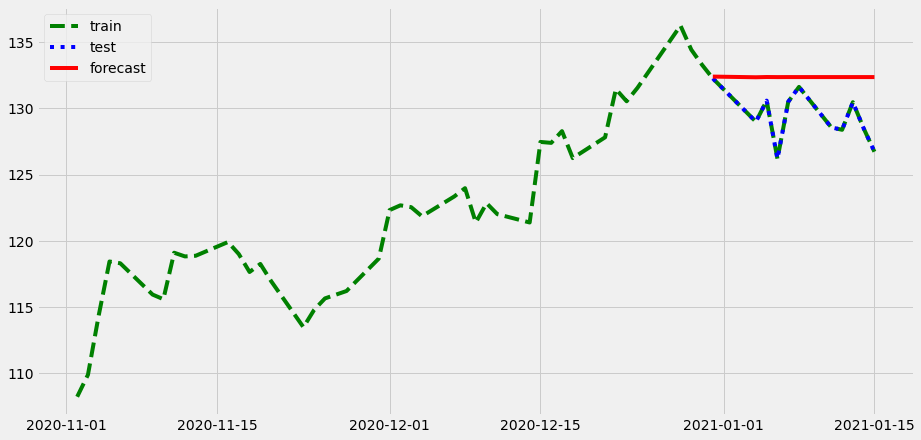

In [412]:
plt.plot(df_all.loc['2020-11-01':'2021-01-15']['AAPL'], color='g', label='train', ls='--')
plt.plot(df_all.loc['2020-12-31':'2021-01-15']['AAPL'], color='b', label='test', ls=':')
plt.plot(pd.DataFrame(results.forecast(steps=11), index=df_all.loc['2020-12-31':'2021-01-15'].index), color='red',label='forecast')
plt.legend()
plt.show()

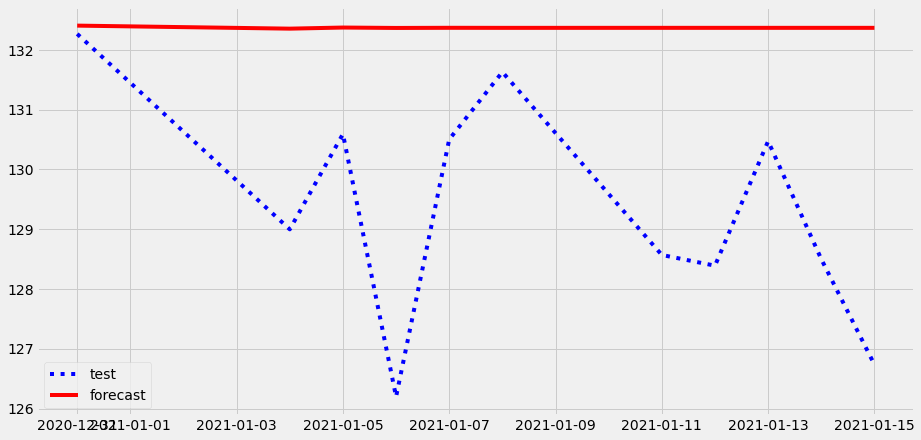

In [413]:
plt.plot(df_all.loc['2020-12-31':'2021-01-15']['AAPL'], color='b', label='test', ls=':')
plt.plot(pd.DataFrame(results.forecast(steps=11), index=df_all.loc['2020-12-31':'2021-01-15'].index), color='red',label='forecast')
plt.legend()
plt.show()

#### Second ARIMA Model - Pre, during, and early post pandemic until March 2021

In [403]:
model = ARIMA(df_all.loc['2019':'2021-03-01']['AAPL'].values, order=(1,1,1))
results = model.fit()

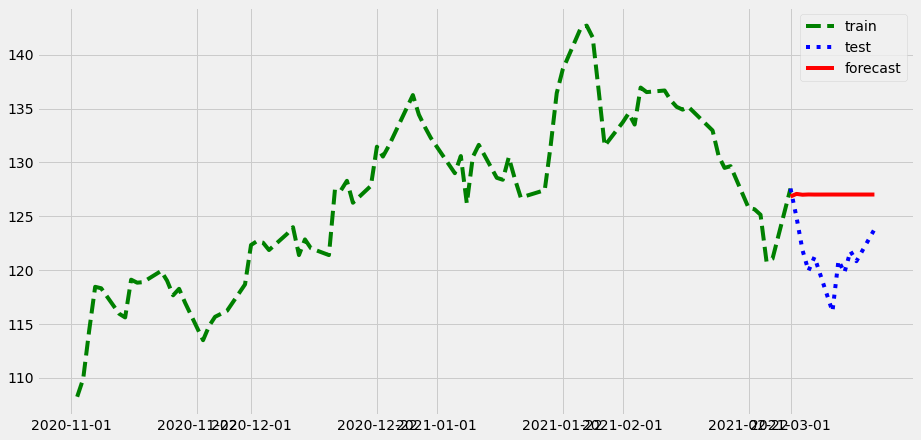

In [404]:
plt.plot(df_all.loc['2020-11-01':'2021-03-01']['AAPL'], color='g', label='train', ls='--')
plt.plot(df_all.loc['2021-03-01':'2021-03-15']['AAPL'], color='b', label='test', ls=':')
plt.plot(pd.DataFrame(results.forecast(steps=11), index=df_all.loc['2021-03-01':'2021-03-15'].index), color='red', label='forecast')
plt.legend()
plt.show()

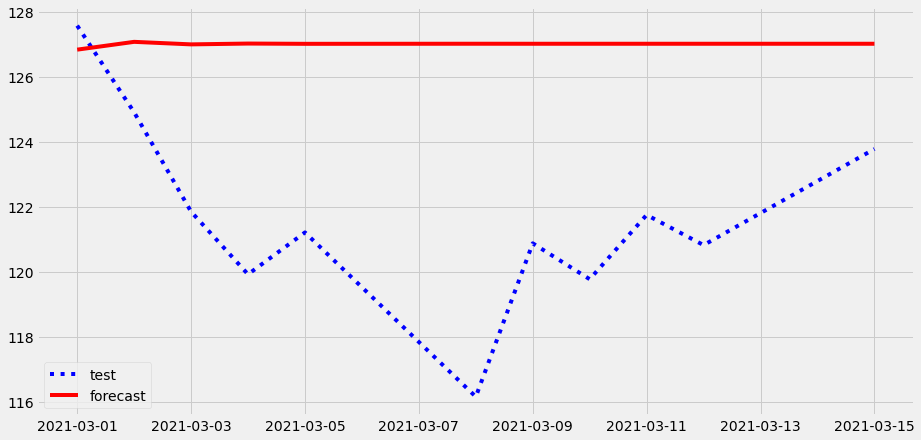

In [405]:
plt.plot(df_all.loc['2021-03-01':'2021-03-15']['AAPL'], color='b', label='test', ls=':')
plt.plot(pd.DataFrame(results.forecast(steps=11), index=df_all.loc['2021-03-01':'2021-03-15'].index), color='red', label='forecast')
plt.legend()
plt.show()

In [406]:
actual = df_all.loc['2021-03-01':'2021-03-15']['AAPL']
predicted = results.forecast(steps=11)

ARIMA_2_RMSE = np.sqrt(mean_squared_error(actual, predicted))
ARIMA_2_R2 = r2_score(actual, predicted)
ARIMA_2_MAPE = mean_absolute_percentage_error(actual, predicted)
ARIMA_2_AIC = results.aic
ARIMA_2_BIC = results.bic
print(f'RMSE : {ARIMA_2_RMSE}')
print(f'R2 : {ARIMA_2_R2}')
print(f'MAPE : {ARIMA_2_MAPE}')
print(f'AIC : {ARIMA_2_AIC}')
print(f'BIC : {ARIMA_2_BIC}')

RMSE : 6.030341739070883
R2 : -3.5290829473533085
MAPE : 0.04523509490809311
AIC : 2285.794861682486
BIC : 2298.686189642288


#### Third ARIMA - Pre, during, and post pandemic until May of 2021

In [400]:
model = ARIMA(df_all.loc['2020':'2021-05-31']['AAPL'].values, order=(1,1,1))
results = model.fit()

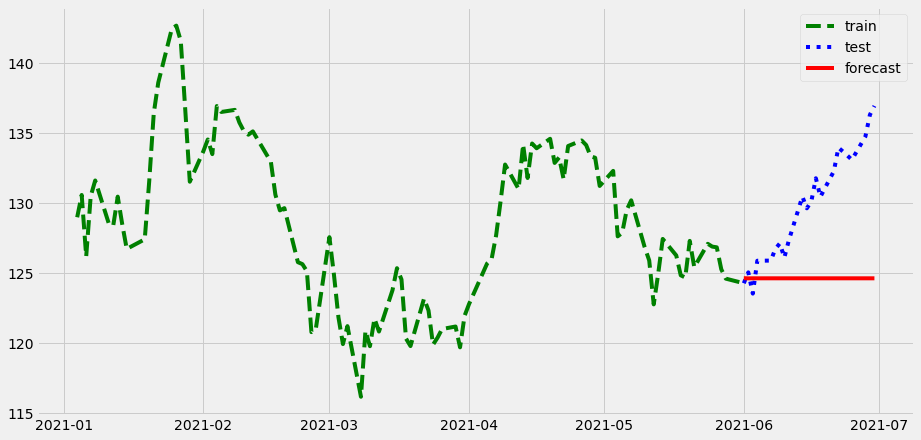

In [401]:
plt.plot(df_all.loc['2021':'2021-06-01']['AAPL'], color='g', label='train', ls='--')
plt.plot(df_all.loc['2021-06-01':'2021-06-30']['AAPL'], color='b', label='test', ls=':')
plt.plot(pd.DataFrame(results.forecast(steps=22), index=df_all.loc['2021-06-01':'2021-06-30'].index), color='red', label='forecast')
plt.legend()
plt.show()

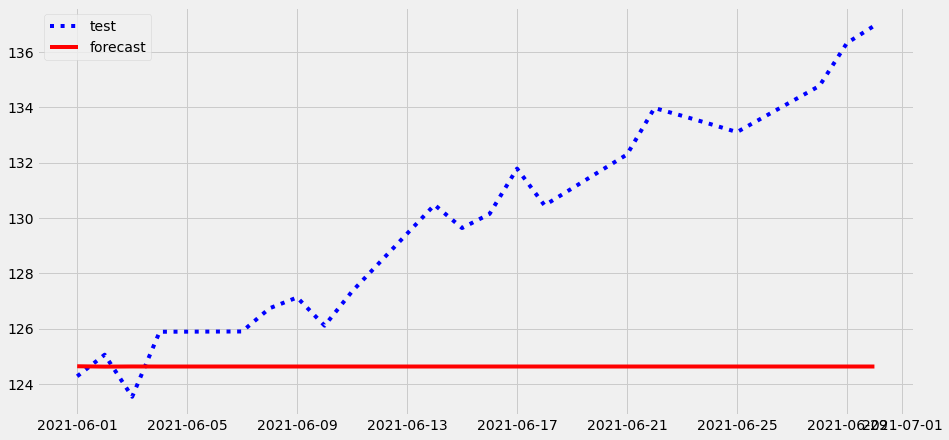

In [402]:
plt.plot(df_all.loc['2021-06-01':'2021-06-30']['AAPL'], color='b', label='test', ls=':')
plt.plot(pd.DataFrame(results.forecast(steps=22), index=df_all.loc['2021-06-01':'2021-06-30'].index), color='red', label='forecast')
plt.legend()
plt.show()

In [141]:
actual = df_all.loc['2021-06-01':'2021-06-30']['AAPL']
predicted = results.forecast(steps=22)

ARIMA_3_RMSE = np.sqrt(mean_squared_error(actual, predicted))
ARIMA_3_R2 = r2_score(actual, predicted)
ARIMA_3_MAPE = mean_absolute_percentage_error(actual, predicted)
ARIMA_3_AIC = results.aic
ARIMA_3_BIC = results.bic
print(f'RMSE : {ARIMA_3_RMSE}')
print(f'R2 : {ARIMA_3_R2}')
print(f'MAPE : {ARIMA_3_MAPE}')
print(f'AIC : {ARIMA_3_AIC}')
print(f'BIC : {ARIMA_3_BIC}')

RMSE : 6.63579999992165
R2 : -1.809462790006151
MAPE : 0.0411563066021127
AIC : 1659.9757382246537
BIC : 1671.583628964055


#### Fourth ARIMA model - More Historical Data starting from 2010

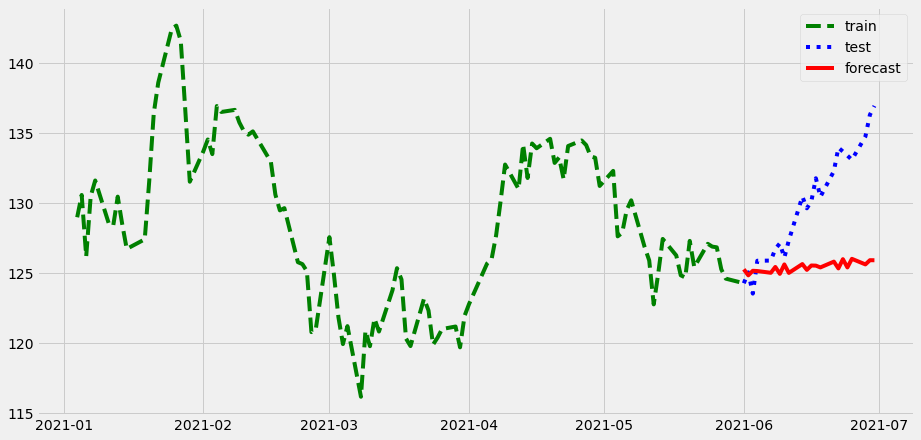

In [397]:
model = ARIMA(df_all.loc[:'2021-05-31']['AAPL'].values, order=(2,2,4))
results = model.fit()

plt.plot(df_all.loc['2021':'2021-06-01']['AAPL'], color='g', label='train', ls='--')
plt.plot(df_all.loc['2021-06-01':'2021-06-30']['AAPL'], color='b', label='test', ls=':')
plt.plot(pd.DataFrame(results.forecast(steps=22), index=df_all.loc['2021-06-01':'2021-06-30'].index), color='red', label='forecast')
plt.legend()
plt.show()

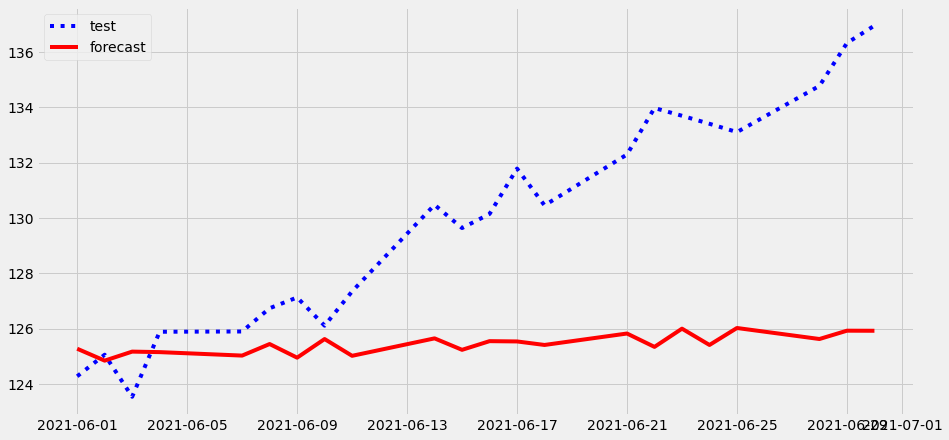

In [399]:
plt.plot(df_all.loc['2021-06-01':'2021-06-30']['AAPL'], color='b', label='test', ls=':')
plt.plot(pd.DataFrame(results.forecast(steps=22), index=df_all.loc['2021-06-01':'2021-06-30'].index), color='red', label='forecast')
plt.legend()
plt.show()

In [143]:
actual = df_all.loc['2021-06-01':'2021-06-30']['AAPL']
predicted = results.forecast(steps=22)

ARIMA_4_RMSE = np.sqrt(mean_squared_error(actual, predicted))
ARIMA_4_R2 = r2_score(actual, predicted)
ARIMA_4_MAPE = mean_absolute_percentage_error(actual, predicted)
ARIMA_4_AIC = results.aic
ARIMA_4_BIC = results.bic
print(f'RMSE : {ARIMA_4_RMSE}')
print(f'R2 : {ARIMA_4_R2}')
print(f'MAPE : {ARIMA_4_MAPE}')
print(f'AIC : {ARIMA_4_AIC}')
print(f'BIC : {ARIMA_4_BIC}')

RMSE : 5.835365185721147
R2 : -1.1725650474896572
MAPE : 0.035751473799768556
AIC : 7745.156779488381
BIC : 7786.584632291048


## 2. Multivariate: Experiment with VAR on AAPL

In [144]:
from statsmodels.tsa.api import VAR

In [145]:
rsi_s

TSLA       ZM     MRNA     AMZN     NFLX     NVDA     AAPL  \
date                                                                        
2019-05-17  31.5759  69.8722  47.8012  51.7562  46.2514  34.9121  43.5362   
2019-05-20  30.1196  64.7326  46.4392  50.5560  43.6618  32.2135  38.6997   
2019-05-21  30.0475  65.1242  46.7718  50.3783  46.7132  35.8291  42.6806   
2019-05-22  27.0444  62.2789  44.7253  50.6504  49.2764  34.1713  39.7252   
2019-05-23  28.7203  58.9720  42.9723  45.2996  46.0640  31.5495  37.4931   
...             ...      ...      ...      ...      ...      ...      ...   
2021-07-02  58.1643  64.8314  66.9522  62.1410  62.7262  78.2771  69.0866   
2021-07-06  53.4951  68.2202  66.3052  70.1810  65.5432  79.1398  71.5427   
2021-07-07  50.2161  64.3710  59.1371  71.0010  61.8922  74.3387  74.2123   
2021-07-08  51.9119  60.4380  63.1310  72.3391  58.7390  68.0969  70.5773   
2021-07-09  52.7711  59.9838  63.1380  71.1416  60.8468  68.9597  72.5660   

                GME  
date                 
2019-05-17  39.2945  
2019-05-20  33.2697  
2019-05-21  34.6128  
2019-05-22  32.3600  
2019-05-23  30.5406  
...             ...  
2021-07-02  48.0503  
2021-07-06  47.3222  
2021-07-07  45.3533  
2021-07-08  45.5462  
2021-07-09  45.5110  

[541 rows x 8 columns]

In [146]:
df_rsi = df_all.join(rsi_s, how='inner', rsuffix='_rsi')
df_rsi = df_rsi[['AAPL', 'AAPL_rsi']]
df_rsi.head()

AAPL  AAPL_rsi
date                           
2019-05-17  46.379920   43.5362
2019-05-20  44.929627   38.6997
2019-05-21  45.790969   42.6806
2019-05-22  44.853554   39.7252
2019-05-23  44.087918   37.4931

In [147]:
data = np.log(df_rsi).diff().dropna()

#### VAR model with Log Differencing

In [148]:
model = VAR(data.values)

In [149]:
results = model.fit(maxlags=4, ic='aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 02, Aug, 2021
Time:                     17:52:48
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -14.9476
Nobs:                     535.000    HQIC:                  -15.0353
Log likelihood:           2536.77    FPE:                2.79096e-07
AIC:                     -15.0917    Det(Omega_mle):     2.69938e-07
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.002925         0.001053            2.777           0.005
L1.y1        -0.406158         0.115329           -3.522           0.000
L1.y2         0.082096         0.042749            1.920           0.055
L2.y1         0.147658

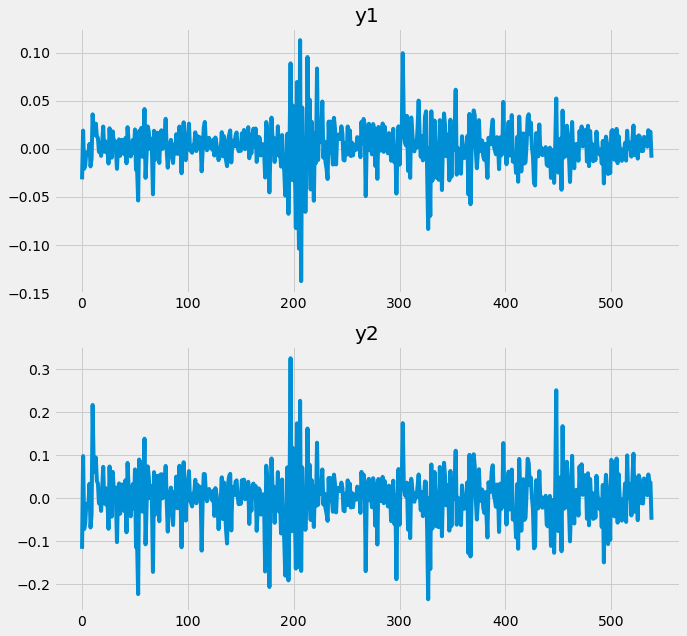

In [150]:
_ = results.plot()

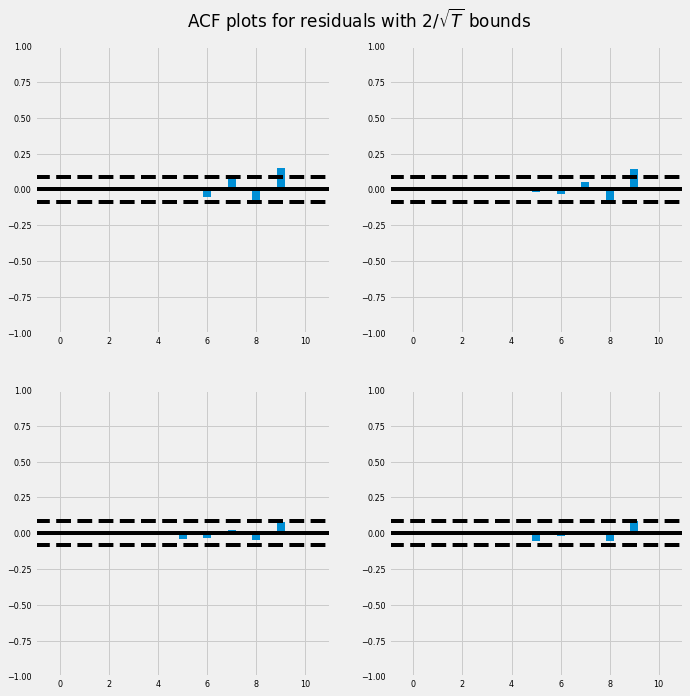

In [151]:
_ = results.plot_acorr()

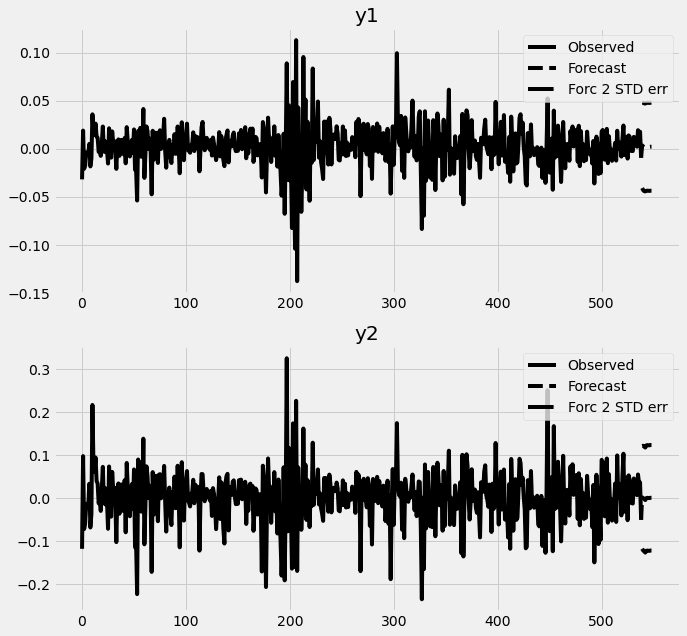

In [152]:
_ = results.plot_forecast(10)

#### VAR without differencing 

In [153]:
model = VAR(df_rsi.values)
results = model.fit(maxlags=4, ic='aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 02, Aug, 2021
Time:                     17:52:49
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    2.31005
Nobs:                     538.000    HQIC:                   2.26152
Log likelihood:          -2116.74    FPE:                    9.30311
AIC:                      2.23035    Det(Omega_mle):         9.13257
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.141933         0.627364            0.226           0.821
L1.y1         0.791438         0.096807            8.175           0.000
L1.y2         0.051501         0.062778            0.820           0.412
L2.y1         0.207410

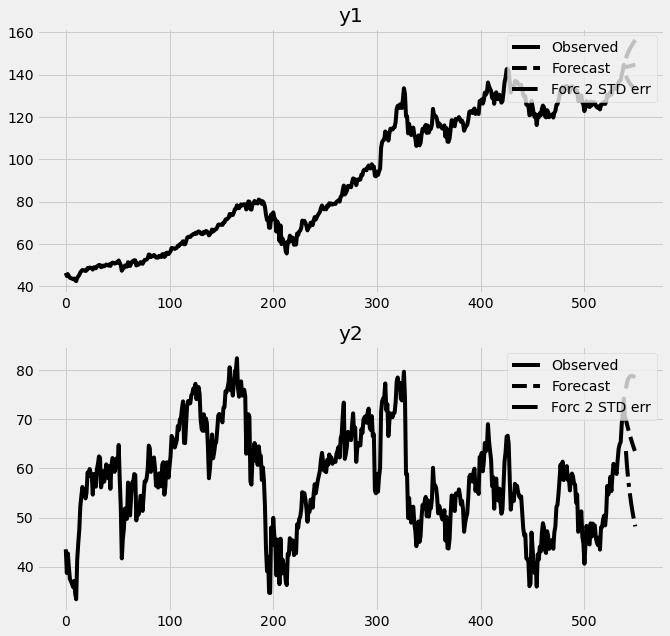

In [154]:
_ = results.plot_forecast(10)

#### VAR Model Forecasting

/Users/tarekatwan/opt/anaconda3/envs/timeseries/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


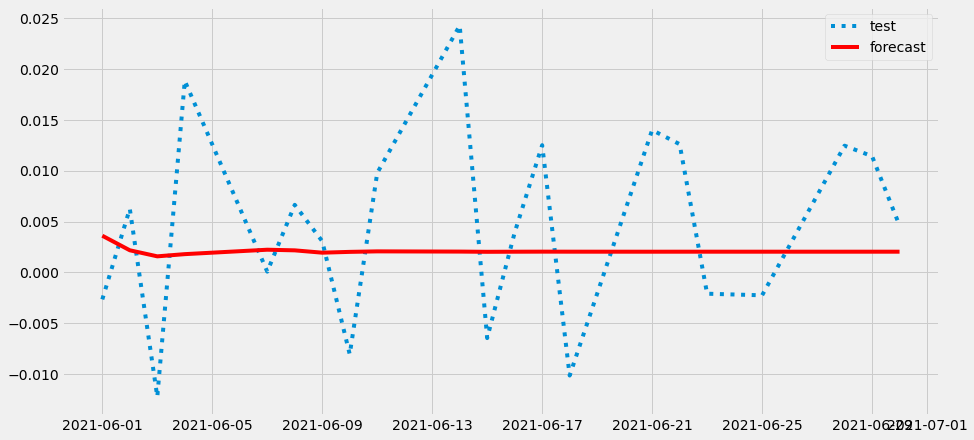

In [155]:
data = np.log(df_rsi.loc[:'2021-05-31']).diff().dropna()
data_plt = np.log(df_rsi).diff().dropna()
model = VAR(data)
results = model.fit(maxlags=4)

lag_order = results.k_ar

#plt.plot(data.loc['2021':'2021-06-01']['AAPL'], color='g', label='train', ls='--')
plt.plot(data_plt.loc['2021-06-01':'2021-06-30']['AAPL'], label='test', ls=':')
plt.plot(pd.DataFrame(results.forecast(data.values[-lag_order:], 22).T[0], index= df_rsi.loc['2021-06-01':'2021-06-30'].index), color='red', label='forecast')
plt.legend()
plt.show()

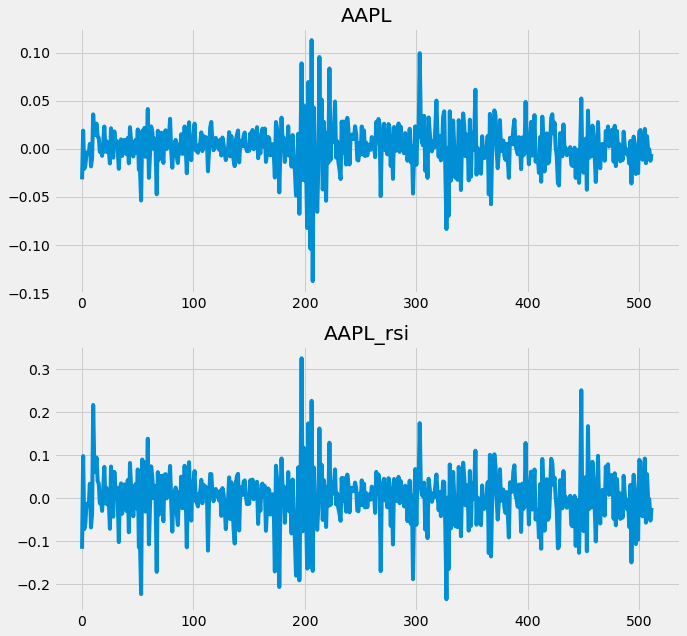

In [156]:

_ = results.plot()

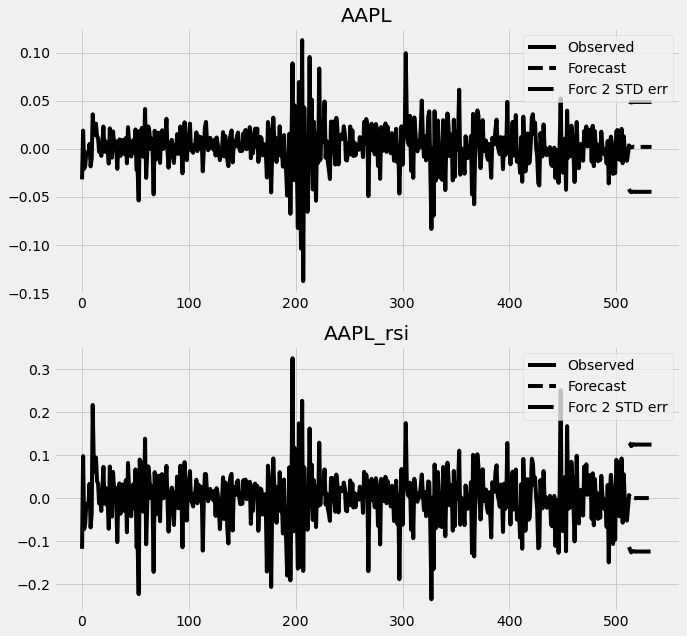

In [157]:
_ = results.plot_forecast(steps=22)

In [158]:
actual = data_plt.loc['2021-06-01':'2021-06-30']['AAPL']
predicted = results.forecast(data.values[-lag_order:], 22).T[0]

VAR_RMSE = np.sqrt(mean_squared_error(actual, predicted))
VAR_R2 = r2_score(actual, predicted)
VAR_MAPE = mean_absolute_percentage_error(actual, predicted)
VAR_AIC = results.aic
VAR_BIC = results.bic
print(f'RMSE : {VAR_RMSE}')
print(f'R2 : {VAR_R2}')
print(f'MAPE : {VAR_MAPE}')
print(f'AIC : {VAR_AIC}')
print(f'BIC : {VAR_BIC}')

RMSE : 0.009686176563573207
R2 : -0.06257264189441236
MAPE : 2.2607525428695747
AIC : -15.034115253092622
BIC : -14.884216304162676


# 8. Time Series Forecasting with Facebook Prophet

## 1. Univarite: Experiment with Prophet on AAPL

In [482]:
from prophet import Prophet
m = Prophet(daily_seasonality = True) 
df = df_all['AAPL'].loc[:'2021-05-31'].reset_index().rename(columns={'date':'ds', 'AAPL': 'y'})
m.fit(df)

In [483]:
future = m.make_future_dataframe(periods=181)
future.tail()

ds
2925 2021-11-21
2926 2021-11-22
2927 2021-11-23
2928 2021-11-24
2929 2021-11-25

In [484]:
forecast = m.predict(future)

In [485]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
2925 2021-11-21  159.912298  153.446596  166.152291
2926 2021-11-22  159.888418  153.977264  166.046061
2927 2021-11-23  160.022214  154.091461  165.700703
2928 2021-11-24  160.120562  153.730638  166.493241
2929 2021-11-25  160.176423  154.317229  166.336870

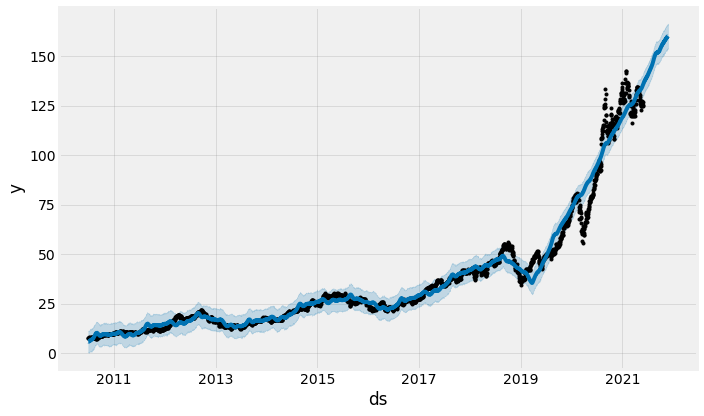

In [486]:
_ = m.plot(forecast)

In [487]:
# remove non trading days
forecast['day'] = forecast['ds'].dt.weekday
forecast = forecast[forecast['day']<=4]

In [488]:
actual = df_all['AAPL'].loc['2021-05-31':'2021-06-30']
predicted = forecast.set_index('ds').loc['2021-05-31':'2021-06-30']['yhat']
# match on dates
combined = actual.to_frame().join(predicted.to_frame(), how='inner')

actual = combined['AAPL']
predicted = combined['yhat']
fb_RMSE = np.sqrt(mean_squared_error(actual, predicted))
fb_R2 = r2_score(actual, predicted)
fb_MAPE = mean_absolute_percentage_error(actual, predicted)
print(f'RMSE : {fb_RMSE}')
print(f'R2 : {fb_R2}')
print(f'MAPE : {fb_MAPE}')

RMSE : 8.624225097005565
R2 : -3.7454442416956564
MAPE : 0.0635256164203671


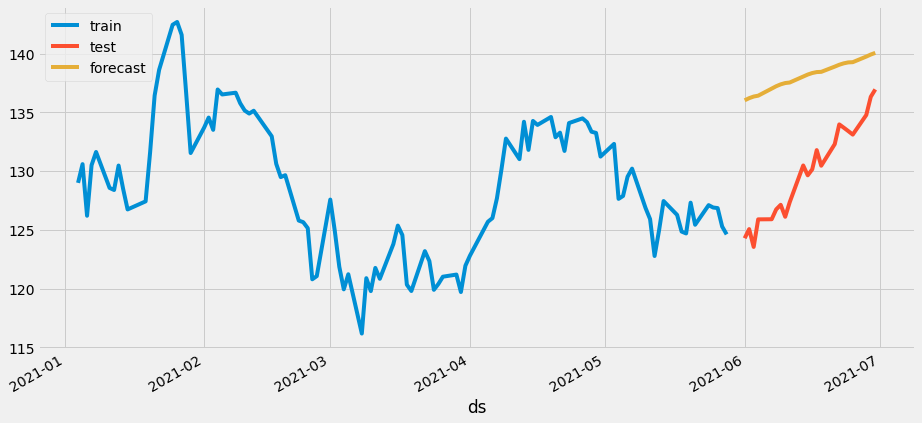

In [489]:
df_all['AAPL'].loc['2021':'2021-05-31'].plot(label='train')
df_all['AAPL'].loc['2021-05-31':'2021-06-30'].plot(label='test')
forecast.set_index('ds').loc['2021-06-01':'2021-06-30']['yhat'].plot(label='forecast')
plt.legend()
plt.show()

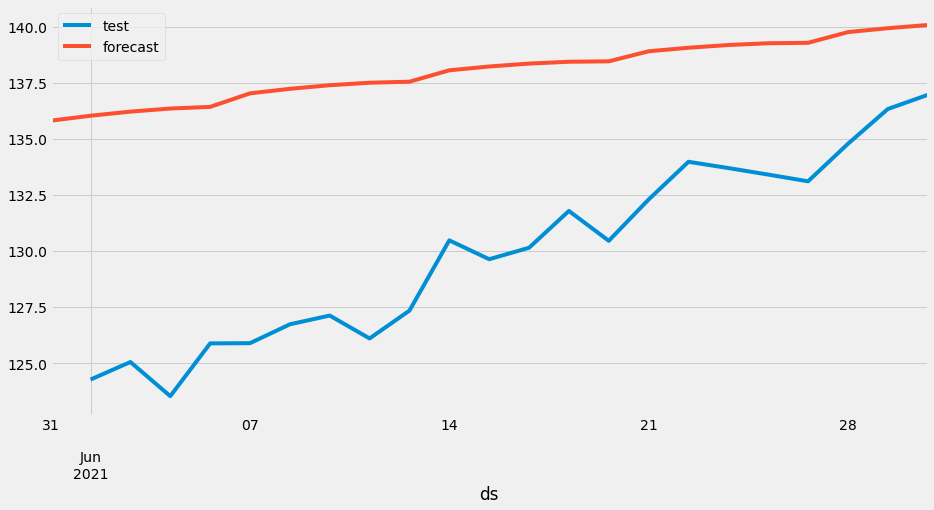

In [490]:
#df_all['AAPL'].loc['2019':'2021-01-01'].plot(label='train')
df_all['AAPL'].loc['2021-05-31':'2021-06-30'].plot(label='test')
forecast.set_index('ds').loc['2021-05-31':'2021-06-30']['yhat'].plot(label='forecast')
plt.legend()
plt.show()

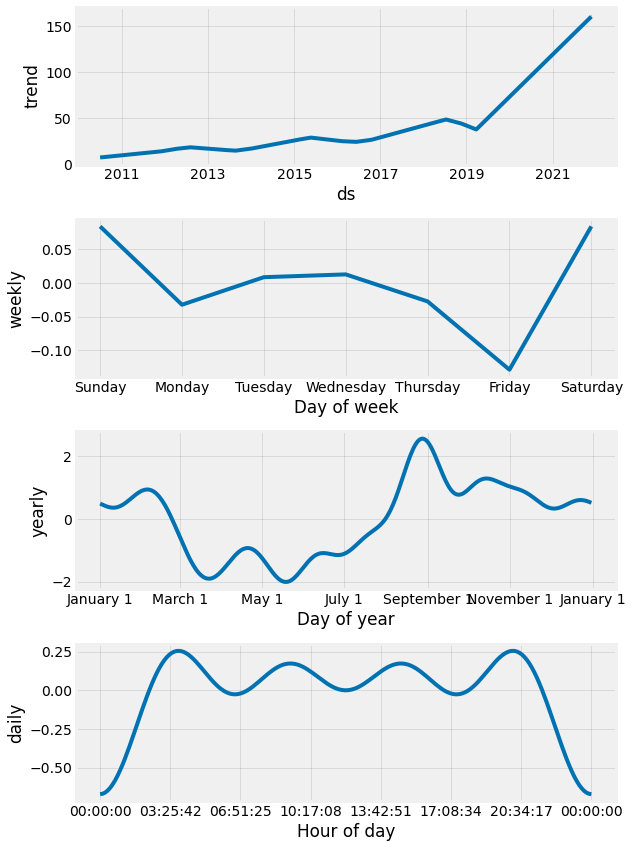

In [459]:
_ = m.plot_components(forecast)

## 2. Multivariate: Experiment with Prophet on AAPL

In [491]:
m = Prophet(daily_seasonality = True) 
df = df_rsi.loc[:'2021-05-31'].reset_index().rename(columns={'date':'ds', 'AAPL': 'y', 'AAPL_rsi': 'rsi'})
df.tail()

ds       y      rsi
508 2021-05-24  127.10  48.7655
509 2021-05-25  126.90  48.4649
510 2021-05-26  126.85  48.3864
511 2021-05-27  125.28  45.9281
512 2021-05-28  124.61  44.9032

In [492]:
m.fit(df)

In [493]:
future = m.make_future_dataframe(periods=181)

In [494]:
forecast = m.predict(future)

In [495]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
689 2021-11-21  166.085535  154.150314  176.909677
690 2021-11-22  167.422990  156.087309  178.635337
691 2021-11-23  167.505064  155.737427  178.772561
692 2021-11-24  167.539795  155.303167  178.833788
693 2021-11-25  167.401079  154.811795  178.687790

In [496]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

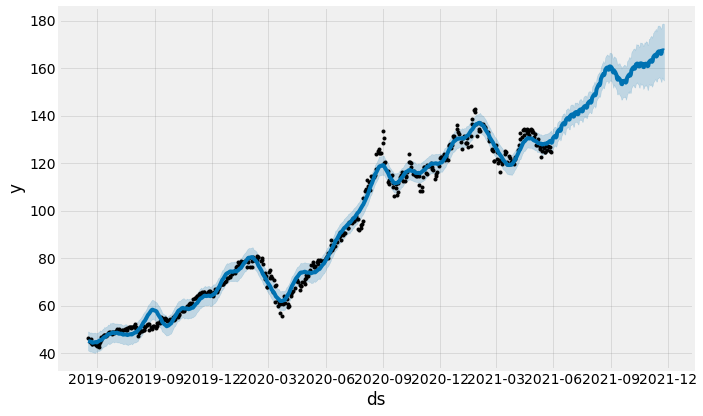

In [497]:
_ = m.plot(forecast)

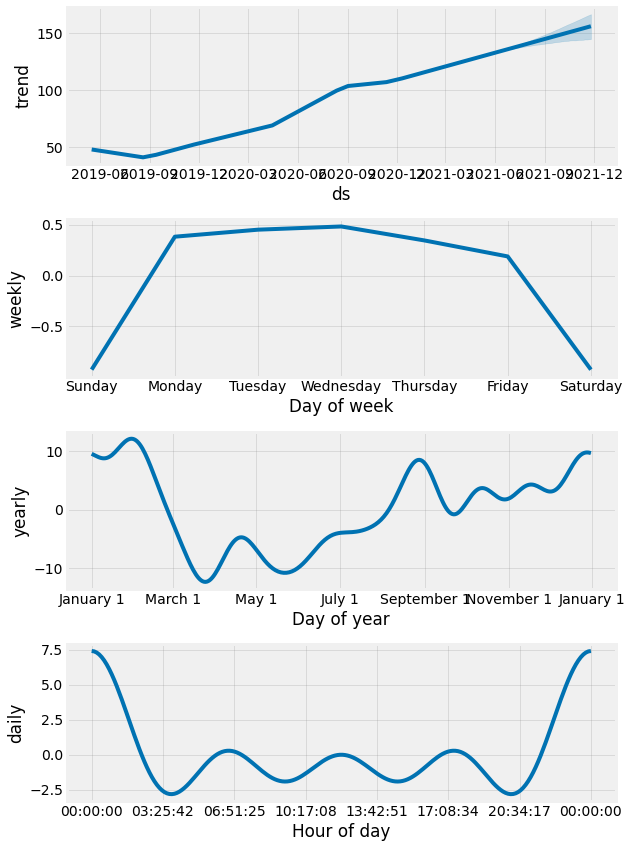

In [498]:
_ = m.plot_components(forecast)

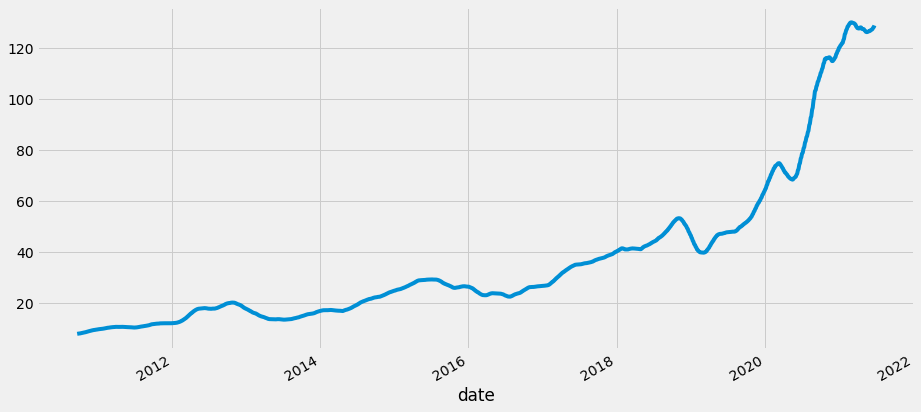

In [499]:
_ = df_all['AAPL'].loc[:'2021-06-24'].rolling(window=60).mean().plot()

In [500]:
# remove non trading days
forecast['day'] = forecast['ds'].dt.weekday
forecast = forecast[forecast['day']<=4]

actual = df_all['AAPL'].loc['2021-05-31':'2021-06-30']
predicted = forecast.set_index('ds').loc['2021-05-31':'2021-06-30']['yhat']
# match on dates
combined = actual.to_frame().join(predicted.to_frame(), how='inner')

actual = combined['AAPL']
predicted = combined['yhat']

fb_2_RMSE = np.sqrt(mean_squared_error(actual, predicted))
fb_2_R2 = r2_score(actual, predicted)
fb_2_MAPE = mean_absolute_percentage_error(actual, predicted)
print(f'RMSE : {fb_2_RMSE}')
print(f'R2 : {fb_2_R2}')
print(f'MAPE : {fb_2_MAPE}')

RMSE : 6.092309635301177
R2 : -1.3681033044378053
MAPE : 0.046379269280638936


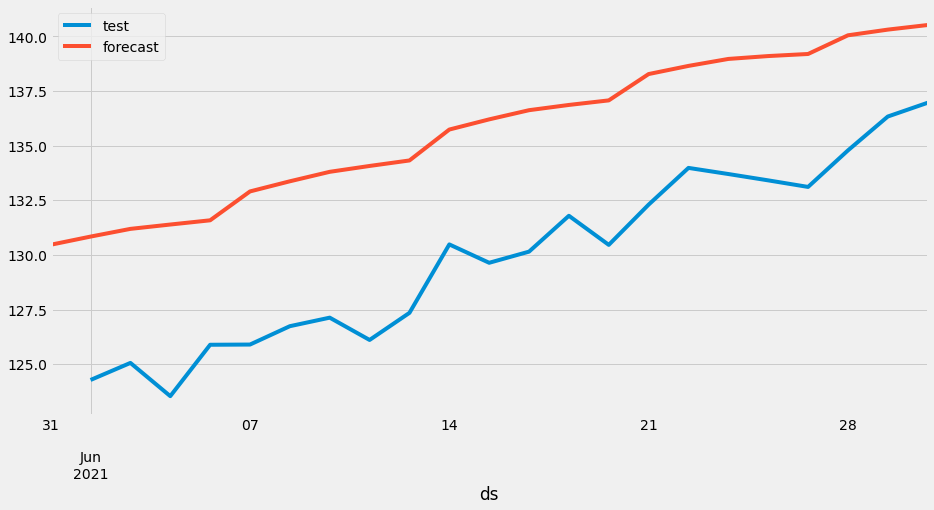

In [501]:
#df_all['AAPL'].loc['2019':'2021-01-01'].plot(label='train')
df_all['AAPL'].loc['2021-05-31':'2021-06-30'].plot(label='test')
forecast.set_index('ds').loc['2021-05-31':'2021-06-30']['yhat'].plot(label='forecast')
plt.legend()
plt.show()

## 3. Additional Regressor
> Additional regressors can be added to the linear part of the model using the add_regressor method or function. A column with the regressor value will need to be present in both the fitting and prediction dataframes

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


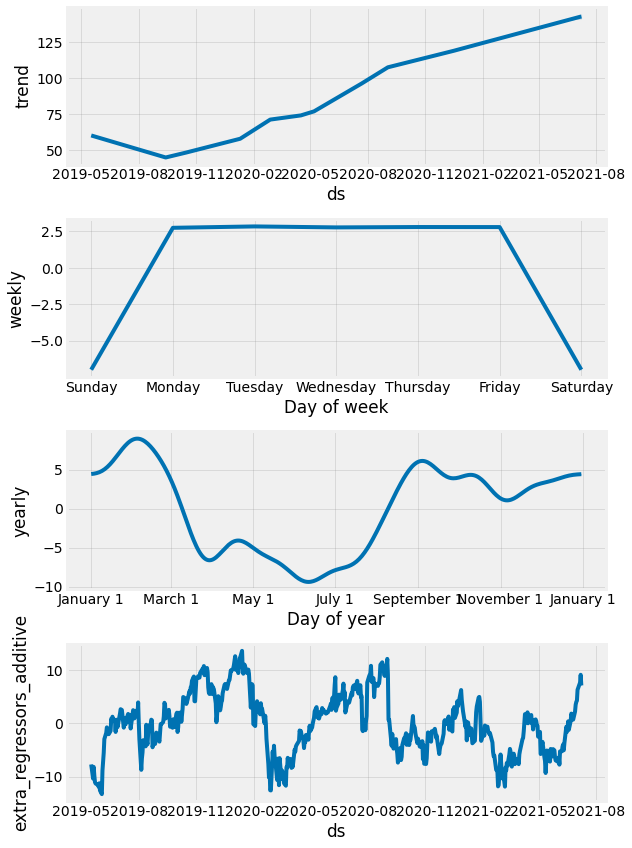

In [502]:
df = df_all['AAPL'].loc[:'2021-05-31'].reset_index().rename(columns={'date':'ds', 'AAPL': 'y'})
df['rsi'] = df.set_index('ds').join(df_rsi, how='left')['AAPL_rsi'].values
df.dropna(inplace=True)
m = Prophet()
m.add_regressor('rsi')
m.fit(df)

future = m.make_future_dataframe(periods=181)
future['rsi'] = future.set_index('ds').join(df_rsi, how='left')['AAPL_rsi'].values
future.dropna(inplace=True)

forecast = m.predict(future)
fig = m.plot_components(forecast)

In [503]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
535 2021-07-01  141.145977  139.021918  143.336909
536 2021-07-02  143.350305  141.136231  145.646064
537 2021-07-06  145.405488  143.077925  147.807989
538 2021-07-07  146.963308  144.712338  149.449202
539 2021-07-08  145.160988  142.688796  147.594640

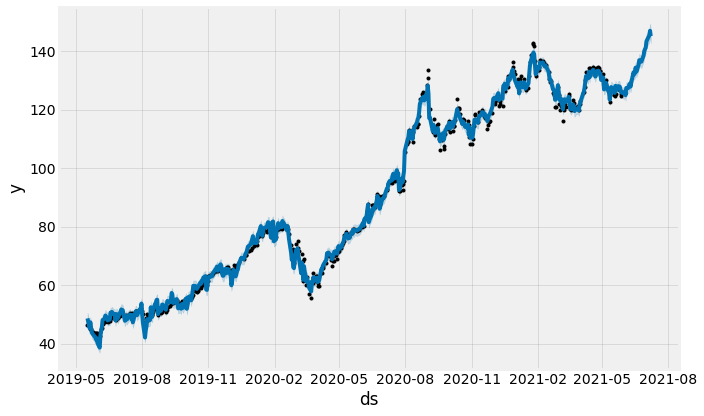

In [504]:
_ = m.plot(forecast)

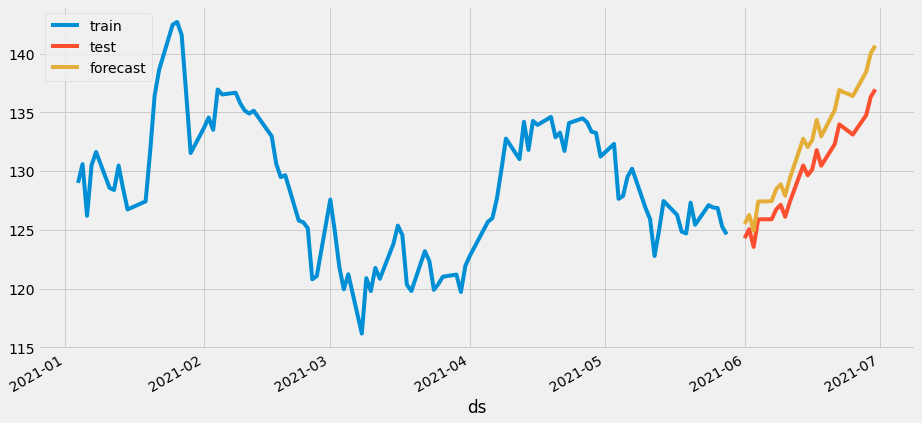

In [505]:
df_rsi['AAPL'].loc['2021':'2021-05-31'].plot(label='train')
df_rsi['AAPL'].loc['2021-05-31':'2021-06-30'].plot(label='test')
forecast.set_index('ds').loc['2021-05-31':'2021-06-30']['yhat'].plot(label='forecast')
plt.legend()
plt.show()

In [506]:
forecast['day'] = forecast['ds'].dt.weekday
forecast = forecast[forecast['day']<=4]

actual = df_all['AAPL'].loc['2021-05-31':'2021-06-30']
predicted = forecast.set_index('ds').loc['2021-05-31':'2021-06-30']['yhat']
# match on dates
combined = actual.to_frame().join(predicted.to_frame(), how='inner')

actual = combined['AAPL']
predicted = combined['yhat']

fb_3_RMSE = np.sqrt(mean_squared_error(actual, predicted))
fb_3_R2 = r2_score(actual, predicted)
fb_3_MAPE = mean_absolute_percentage_error(actual, predicted)
print(f'RMSE : {fb_3_RMSE}')
print(f'R2 : {fb_3_R2}')
print(f'MAPE : {fb_3_MAPE}')

RMSE : 2.5330851843170636
R2 : 0.5906108788515747
MAPE : 0.018307290299471812


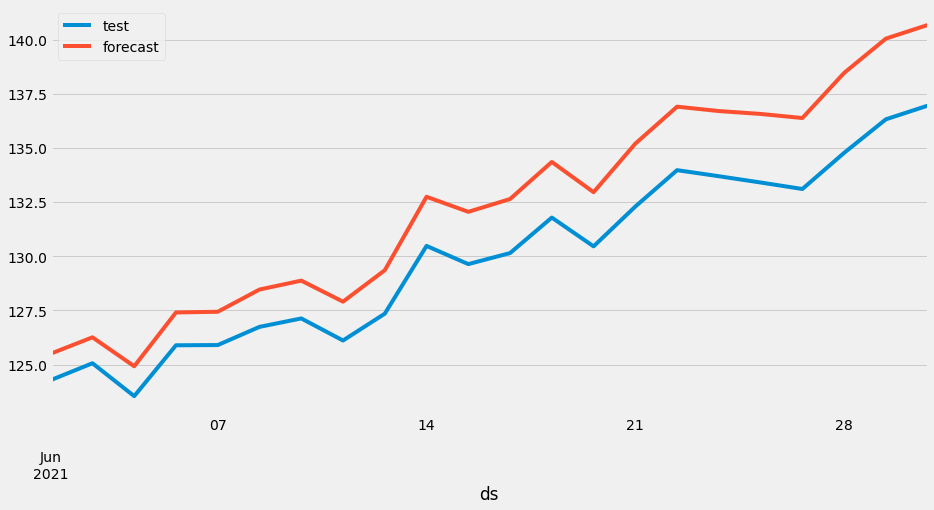

In [507]:
#df_all['AAPL'].loc['2019':'2021-01-01'].plot(label='train')
df_all['AAPL'].loc['2021-05-31':'2021-06-30'].plot(label='test')
forecast.set_index('ds').loc['2021-05-31':'2021-06-30']['yhat'].plot(label='forecast')
plt.legend()
plt.show()

# Store Benchmark Metrics for LSTM comparison

In [508]:
metrics = {
    'fb_1' : [fb_RMSE, fb_R2, fb_MAPE],
    'fb_2' : [fb_2_RMSE, fb_2_R2, fb_2_MAPE],
    'fb_3' : [fb_3_RMSE, fb_3_R2, fb_3_MAPE],
    'ARIMA_1': [ARIMA_1_RMSE, ARIMA_1_R2, ARIMA_1_MAPE],
    'ARIMA_2': [ARIMA_2_RMSE, ARIMA_2_R2, ARIMA_2_MAPE],
    'ARIMA_3': [ARIMA_3_RMSE, ARIMA_3_R2, ARIMA_3_MAPE],
    'ARIMA_4': [ARIMA_4_RMSE, ARIMA_4_R2, ARIMA_4_MAPE],
    'VAR_1' : [VAR_RMSE, VAR_R2, VAR_MAPE]
}

In [509]:
metrics_df = pd.DataFrame(metrics, index=['RMSE', 'R2', 'MAPE'])
metrics_df.to_pickle('metrics_df.pickle')

In [510]:
metrics_df

fb_1      fb_2      fb_3   ARIMA_1   ARIMA_2   ARIMA_3   ARIMA_4  \
RMSE  8.624225  6.092310  2.533085  3.531296  6.030342  6.635800  5.835365   
R2   -3.745444 -1.368103  0.590611 -2.707079 -3.529083 -1.809463 -1.172565   
MAPE  0.063526  0.046379  0.018307  0.023564  0.045235  0.041156  0.035751   

         VAR_1  
RMSE  0.009686  
R2   -0.062573  
MAPE  2.260753

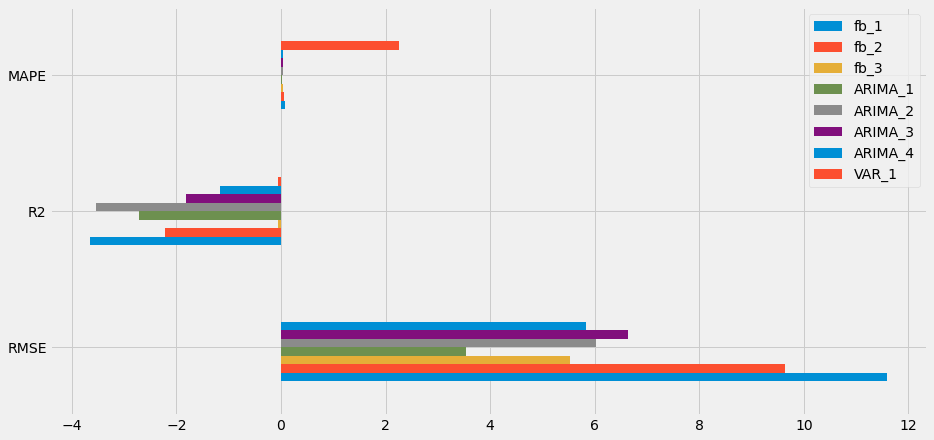

In [209]:
_ = metrics_df.plot.barh(subplots=False)

# 9. Time Series Forecasting with LSTM 

In [667]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential

In [668]:
tf.__version__

'2.5.0'

In [669]:
#df_all = pd.concat([i[1].rename(columns={'close':i[0]}) for i in s_close], axis=1).dropna()

**Sliding Window function for experimenting with different windows**

In [705]:
def sliding_window(df, window):
    x = []
    y = []
    for i in range(len(df)-window):
        feature = df.iloc[i: (i+window)]
        target = df.iloc[(i+window)]
        x.append(feature)
        y.append(target)
    return np.array(x), np.array(y).reshape(-1,1)

In [706]:
# 5 day window for AAPL
window = 2
x, y = sliding_window(df_all['AAPL'], window)

In [707]:
x[:5]

array([[7.86624698, 7.72376587],
       [7.72376587, 7.6301091 ],
       [7.6301091 , 7.58282011],
       [7.58282011, 7.63471517],
       [7.63471517, 7.94286128]])

In [708]:
y[:5]

array([[7.6301091 ],
       [7.58282011],
       [7.63471517],
       [7.94286128],
       [7.92520468]])

**Splitting the Data into Train and Test**

In [757]:
split_1 = int(0.85 * len(x))
train_x = x[:split_1]
x_test = x[split_1:]
train_y = y[:split_1]
y_test = y[split_1:]

In [710]:
split_2 = int(0.90 * len(train_x))
x_train = train_x[:split_2]
x_val = train_x[split_2:]
y_train = train_y[:split_2]
y_val = train_y[split_2:]

In [711]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(2121, 2)
(417, 2)
(236, 2)


### Scaling Data

In [712]:
# Use the MinMaxScaler to scale data between 0 and 1.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_val = scaler.transform(x_val)
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)
y_val = scaler.transform(y_val)

In [713]:
# reshape features for LSTM
x_train = x_train.reshape(x_train.shape + (1,))
x_test = x_test.reshape(x_test.shape + (1,))
x_val = x_val.reshape(x_val.shape + (1,))

In [714]:
x_train.shape

(2121, 2, 1)

In [715]:
x_train[0:5]

array([[[0.00368475],
        [0.00259618]],

       [[0.00263197],
        [0.00191357]],

       [[0.00193994],
        [0.0015689 ]],

       [[0.00159053],
        [0.00194714]],

       [[0.00197398],
        [0.00419306]]])

### Building our LSTM Network

In [724]:
from tensorflow.keras.utils import plot_model

model = Sequential()
dropout = 0.2

model.add(
    LSTM(units=window, return_sequences=True, input_shape=(x_train.shape[1], 1), activation='relu')
)
model.add(Dropout(dropout))
model.add(
    LSTM(units=window, return_sequences=True, activation='relu')
)
model.add(Dropout(dropout))
model.add(
    LSTM(units=window, activation='relu')
)
model.add(Dropout(dropout))
model.add(Dense(y_train.shape[1]))

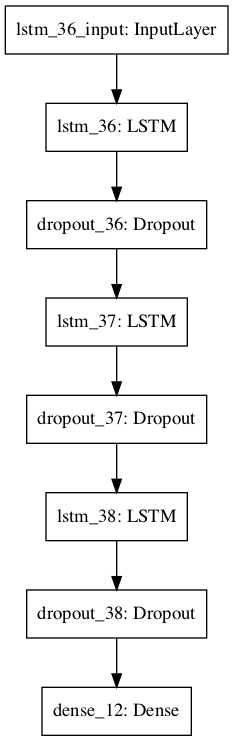

In [725]:
plot_model(model)

In [726]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_36 (LSTM)               (None, 2, 2)              32        
_________________________________________________________________
dropout_36 (Dropout)         (None, 2, 2)              0         
_________________________________________________________________
lstm_37 (LSTM)               (None, 2, 2)              40        
_________________________________________________________________
dropout_37 (Dropout)         (None, 2, 2)              0         
_________________________________________________________________
lstm_38 (LSTM)               (None, 2)                 40        
_________________________________________________________________
dropout_38 (Dropout)         (None, 2)                 0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)               

### Compiling the LSTM Model

In [727]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(), 
              metrics=[tf.keras.losses.MeanAbsolutePercentageError(), 
                                     tf.keras.losses.MeanSquaredError()])

### Fitting our LSTM 

In [728]:
x_train.dtype

dtype('float64')

In [729]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor="loss",
    min_delta=0,
    patience=8,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [733]:
history = model.fit(
            x_train, 
            y_train,
            epochs = 50,
            shuffle=False,
            validation_data=(x_val, y_val),
            batch_size=30,
            verbose=1,
            callbacks=[callback]
        )

Epoch 1/50
71/71 [==============================] - 0s 3ms/step - loss: 0.0063 - mean_absolute_percentage_error: 53334.0625 - mean_squared_error: 0.0063 - val_loss: 0.0184 - val_mean_absolute_percentage_error: 43.2479 - val_mean_squared_error: 0.0187
Epoch 2/50
71/71 [==============================] - 0s 4ms/step - loss: 0.0062 - mean_absolute_percentage_error: 62959.7109 - mean_squared_error: 0.0063 - val_loss: 0.0157 - val_mean_absolute_percentage_error: 40.0316 - val_mean_squared_error: 0.0160
Epoch 3/50
71/71 [==============================] - 0s 4ms/step - loss: 0.0054 - mean_absolute_percentage_error: 48937.2422 - mean_squared_error: 0.0054 - val_loss: 0.0115 - val_mean_absolute_percentage_error: 34.3094 - val_mean_squared_error: 0.0117
Epoch 4/50
71/71 [==============================] - 0s 4ms/step - loss: 0.0049 - mean_absolute_percentage_error: 56866.7617 - mean_squared_error: 0.0049 - val_loss: 0.0080 - val_mean_absolute_percentage_error: 28.7808 - val_mean_squared_error: 0.0

### Observed Training Scores and Metrics

In [734]:
training_results = pd.DataFrame(history.history)

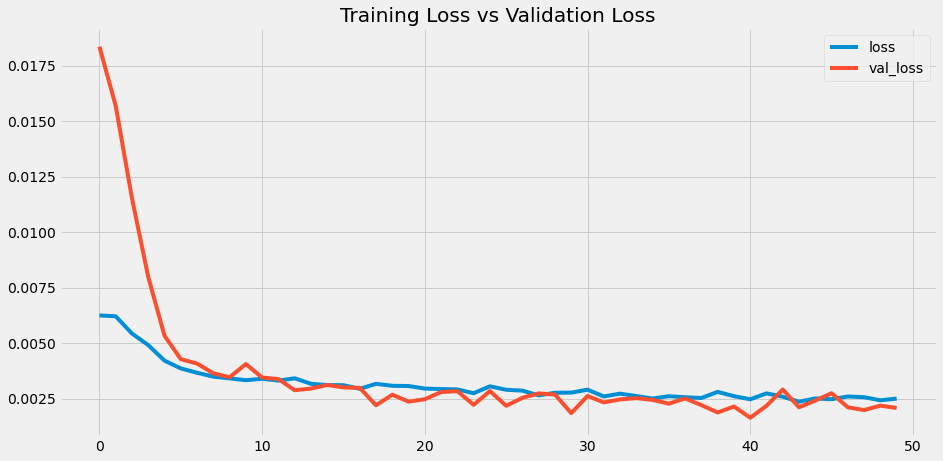

In [735]:
_ = training_results[['loss', 'val_loss']].plot(title='Training Loss vs Validation Loss')

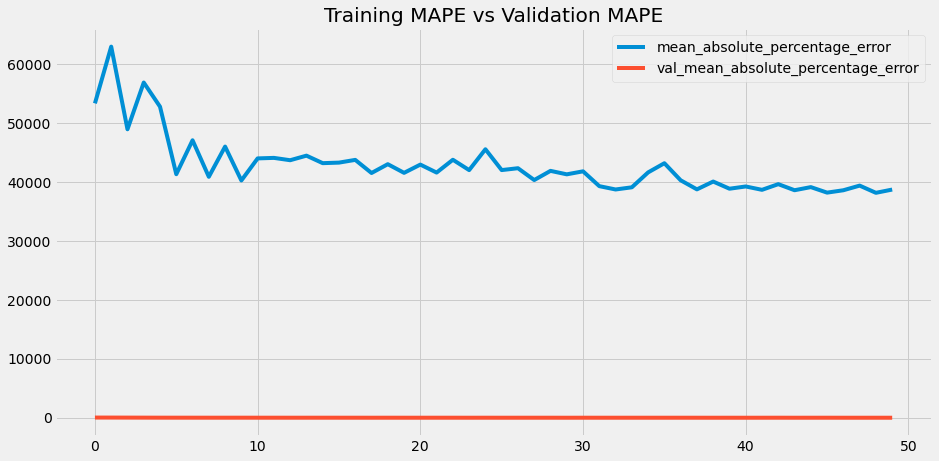

In [736]:
_ = training_results[['mean_absolute_percentage_error', 'val_mean_absolute_percentage_error']].plot(title='Training MAPE vs Validation MAPE')

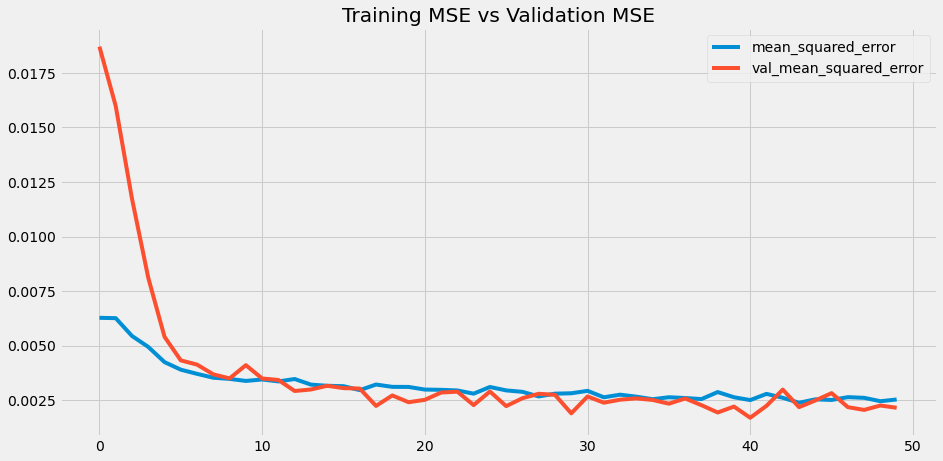

In [737]:
_ = training_results[['mean_squared_error', 'val_mean_squared_error']].plot(title='Training MSE vs Validation MSE')

### Evaluate LSTM Model

In [738]:
model.evaluate(x_test, y_test)

14/14 [==============================] - 0s 1ms/step - loss: 0.0893 - mean_absolute_percentage_error: 36.9990 - mean_squared_error: 0.1003


[0.08928325772285461, 36.9990234375, 0.1002517119050026]

In [739]:
training_results.tail(1)

loss  mean_absolute_percentage_error  mean_squared_error  val_loss  \
49  0.002507                    38713.824219            0.002529  0.002086   

    val_mean_absolute_percentage_error  val_mean_squared_error  
49                           13.807347                0.002148

### LSTM Prediction

In [740]:
predicted = model.predict(x_test)

In [741]:
y_test.shape

(417, 1)

In [742]:
predicted.shape

(417, 1)

In [743]:
df_all['AAPL'].index[-len(y_test): ].shape

(417,)

In [744]:
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

In [745]:
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Real": y_test.reshape(-1,1).ravel(),
    "Predicted": predicted.ravel()
    }, index = df_all['AAPL'].index[-len(y_test): ])
stocks.head()

Real  Predicted
date                            
2019-11-11  64.781141  52.190990
2019-11-12  64.721845  52.342461
2019-11-13  65.341985  52.525650
2019-11-14  64.889851  52.605564
2019-11-15  65.660702  52.765156

<AxesSubplot:xlabel='date'>

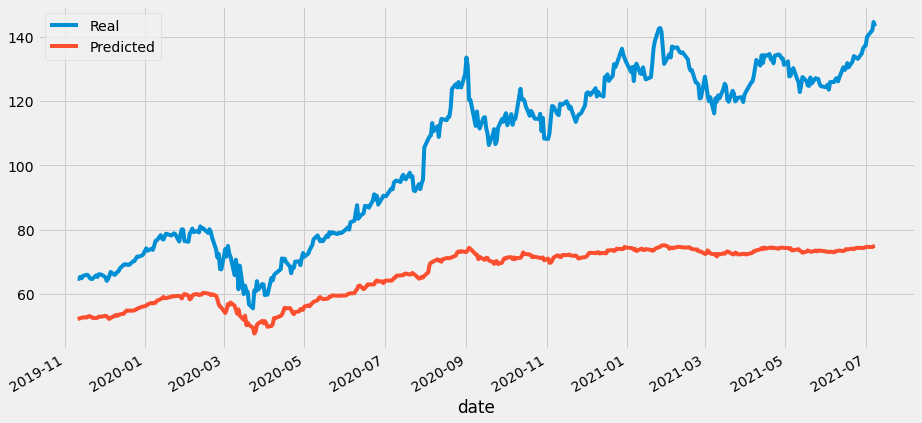

In [746]:
stocks.plot()

In [747]:
LSTM_R2 = r2_score(y_test, predicted)
LSTM_RMSE = np.sqrt(mean_squared_error(y_test, predicted))
LSTM_MAPE = mean_absolute_percentage_error(y_test, predicted)

print(f'RMSE : {LSTM_RMSE}')
print(f'R2 : {LSTM_R2}')
print(f'MAPE : {LSTM_MAPE}')

RMSE : 40.99650275671605
R2 : -1.5331108551047996
MAPE : 0.33453318444688396


## LSTM Trained on Longer window

In [758]:
# 5 day window for AAPL
def train_lstm(window, df, units):
    
    x, y = sliding_window(df['AAPL'], window)

    split_1 = int(0.85 * len(x))
    train_x = x[:split_1]
    x_test = x[split_1:]
    train_y = y[:split_1]
    y_test = y[split_1:]

    split_2 = int(0.90 * len(train_x))
    x_train = train_x[:split_2]
    x_val = train_x[split_2:]
    y_train = train_y[:split_2]
    y_val = train_y[split_2:]

    # Use the MinMaxScaler to scale data between 0 and 1.
    from sklearn.preprocessing import MinMaxScaler

    scaler = MinMaxScaler()
    scaler.fit(x)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    x_val = scaler.transform(x_val)
    scaler.fit(y)
    y_train = scaler.transform(y_train)
    y_test = scaler.transform(y_test)
    y_val = scaler.transform(y_val)

    # reshape features for LSTM
    x_train = x_train.reshape(x_train.shape + (1,))
    x_test = x_test.reshape(x_test.shape + (1,))
    x_val = x_val.reshape(x_val.shape + (1,))

    model = Sequential()
    dropout = 0.2

    model.add(
        LSTM(units=units, return_sequences=True, input_shape=(x_train.shape[1], 1), activation='relu')
    )
    model.add(Dropout(dropout))
    model.add(
        LSTM(units=units, return_sequences=True, activation='relu')
    )
    model.add(Dropout(dropout))
    model.add(
        LSTM(units=units, activation='relu')
    )
    model.add(Dropout(dropout))
    model.add(Dense(y_train.shape[1]))

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.MeanSquaredError(), 
                  metrics=[tf.keras.losses.MeanAbsolutePercentageError(), 
                                         tf.keras.losses.MeanSquaredError()])
    return model, (x_train, y_train, x_test, y_test, x_val, y_val)

In [759]:
df_all = pd.concat([i[1].rename(columns={'close':i[0]}) for i in s_close if i[0] not in ['ZM', 'MRNA']], axis=1).dropna()
model, data = train_lstm(window=5, df=df_all, units=5)

In [760]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_39 (LSTM)               (None, 5, 5)              140       
_________________________________________________________________
dropout_39 (Dropout)         (None, 5, 5)              0         
_________________________________________________________________
lstm_40 (LSTM)               (None, 5, 5)              220       
_________________________________________________________________
dropout_40 (Dropout)         (None, 5, 5)              0         
_________________________________________________________________
lstm_41 (LSTM)               (None, 5)                 220       
_________________________________________________________________
dropout_41 (Dropout)         (None, 5)                 0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)               

In [761]:
x_train, y_train, x_test, y_test, x_val, y_val = data

In [762]:
history = model.fit(
            x_train, 
            y_train,
            epochs = 50,
            shuffle=False,
            validation_data=(x_val, y_val),
            batch_size=30,
            verbose=1,
            callbacks=[callback]
        )

Epoch 1/50
71/71 [==============================] - 4s 15ms/step - loss: 0.0034 - mean_absolute_percentage_error: 811.0316 - mean_squared_error: 0.0034 - val_loss: 0.0104 - val_mean_absolute_percentage_error: 29.4355 - val_mean_squared_error: 0.0108
Epoch 2/50
71/71 [==============================] - 0s 7ms/step - loss: 0.0115 - mean_absolute_percentage_error: 109164.5469 - mean_squared_error: 0.0116 - val_loss: 0.0255 - val_mean_absolute_percentage_error: 50.7151 - val_mean_squared_error: 0.0260
Epoch 3/50
71/71 [==============================] - 0s 7ms/step - loss: 0.0079 - mean_absolute_percentage_error: 70800.1797 - mean_squared_error: 0.0079 - val_loss: 0.0235 - val_mean_absolute_percentage_error: 48.5424 - val_mean_squared_error: 0.0240
Epoch 4/50
71/71 [==============================] - 0s 7ms/step - loss: 0.0075 - mean_absolute_percentage_error: 64820.8438 - mean_squared_error: 0.0075 - val_loss: 0.0217 - val_mean_absolute_percentage_error: 46.5693 - val_mean_squared_error: 0.0

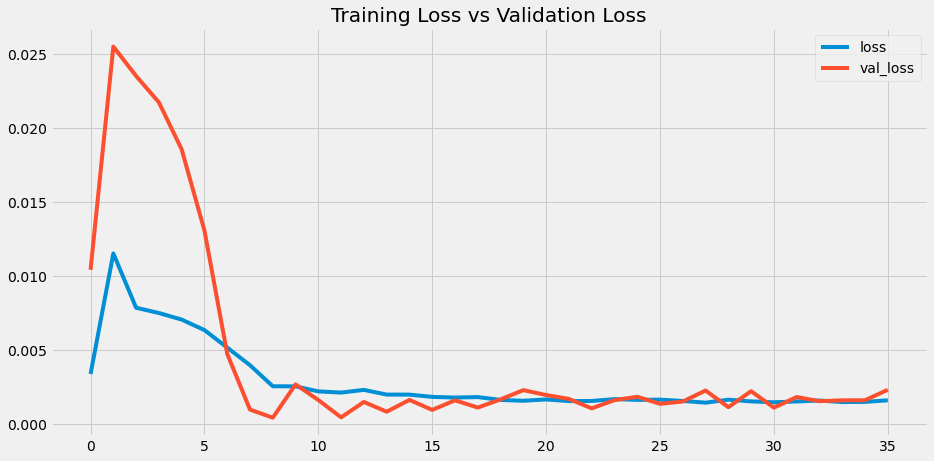

In [764]:
training_results = pd.DataFrame(history.history)
_ = training_results[['loss', 'val_loss']].plot(title='Training Loss vs Validation Loss')

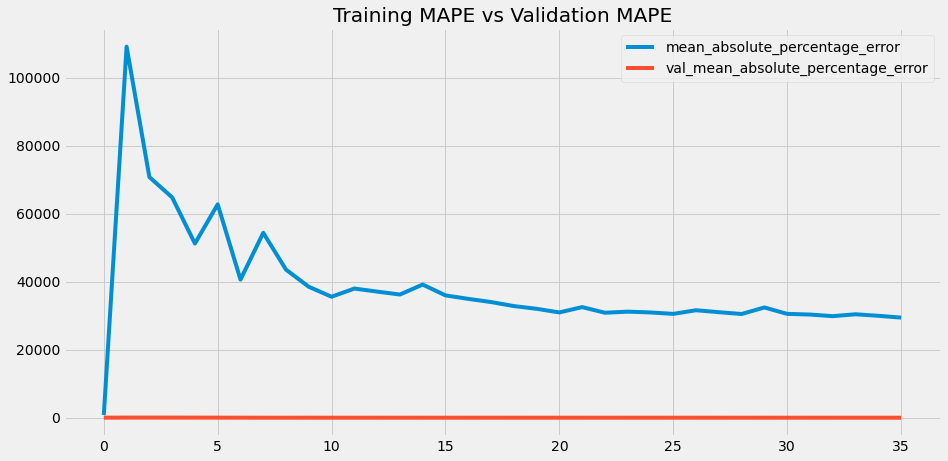

In [765]:
_ = training_results[['mean_absolute_percentage_error', 'val_mean_absolute_percentage_error']].plot(title='Training MAPE vs Validation MAPE')

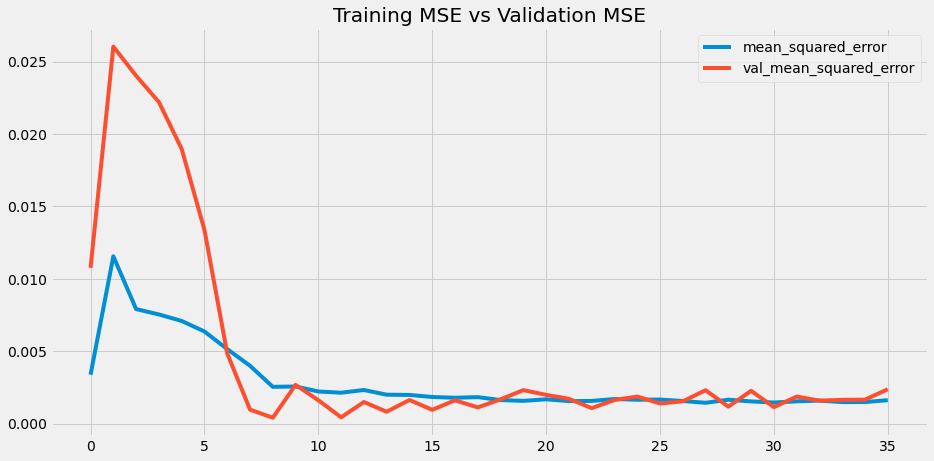

In [766]:
_ = training_results[['mean_squared_error', 'val_mean_squared_error']].plot(title='Training MSE vs Validation MSE')

<AxesSubplot:xlabel='date'>

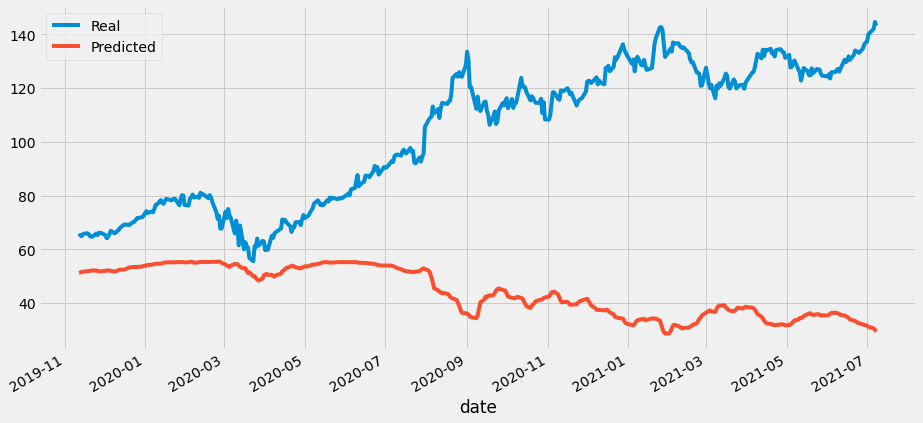

In [767]:
predicted = model.predict(x_test)
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Real": y_test.reshape(-1,1).ravel(),
    "Predicted": predicted.ravel()
    }, index = df_all['AAPL'].index[-len(y_test): ])


stocks.plot()

In [768]:
LSTM_2_R2 = r2_score(y_test, predicted)
LSTM_2_RMSE = np.sqrt(mean_squared_error(y_test, predicted))
LSTM_2_MAPE = mean_absolute_percentage_error(y_test, predicted)

print(f'RMSE : {LSTM_2_RMSE}')
print(f'R2 : {LSTM_2_R2}')
print(f'MAPE : {LSTM_2_MAPE}')

RMSE : 68.12302565325734
R2 : -6.014924718789529
MAPE : 0.5178571313951976


# 10. Score Evaluation

In [769]:
metrics_df['LSTM_1'] = [LSTM_RMSE, LSTM_R2, LSTM_MAPE]
metrics_df['LSTM_2'] = [LSTM_2_RMSE, LSTM_2_R2, LSTM_2_MAPE]
metrics_df

fb_1      fb_2      fb_3   ARIMA_1   ARIMA_2   ARIMA_3   ARIMA_4  \
RMSE  8.624225  6.092310  2.533085  3.531296  6.030342  6.635800  5.835365   
R2   -3.745444 -1.368103  0.590611 -2.707079 -3.529083 -1.809463 -1.172565   
MAPE  0.063526  0.046379  0.018307  0.023564  0.045235  0.041156  0.035751   

         VAR_1     LSTM_1     LSTM_2        LR  
RMSE  0.009686  40.996503  68.123026  0.010887  
R2   -0.062573  -1.533111  -6.014925 -0.189781  
MAPE  2.260753   0.334533   0.517857  0.952833

<AxesSubplot:>

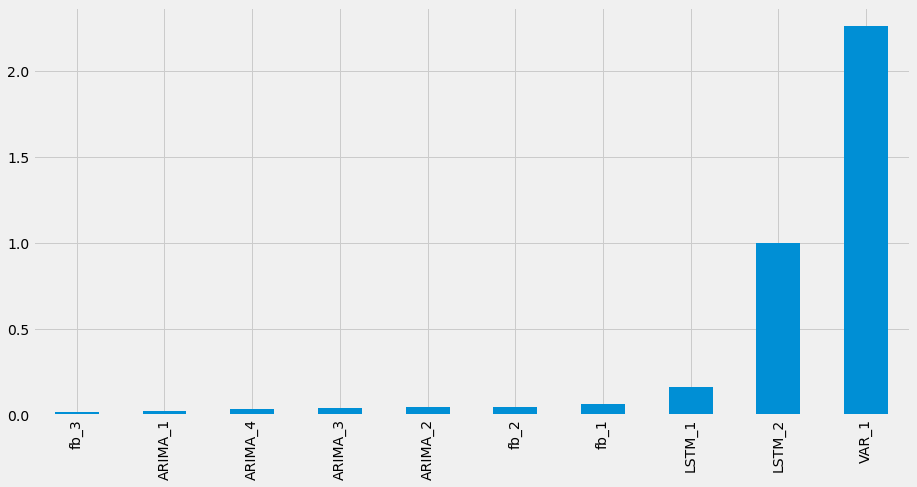

In [524]:
metrics_df.loc['MAPE'].sort_values().plot.bar()

In [770]:
metrics_df.loc['RMSE'].sort_values()

VAR_1       0.009686
LR          0.010887
fb_3        2.533085
ARIMA_1     3.531296
ARIMA_4     5.835365
ARIMA_2     6.030342
fb_2        6.092310
ARIMA_3     6.635800
fb_1        8.624225
LSTM_1     40.996503
LSTM_2     68.123026
Name: RMSE, dtype: float64

In [771]:
metrics_df.loc['MAPE'].sort_values()

fb_3       0.018307
ARIMA_1    0.023564
ARIMA_4    0.035751
ARIMA_3    0.041156
ARIMA_2    0.045235
fb_2       0.046379
fb_1       0.063526
LSTM_1     0.334533
LSTM_2     0.517857
LR         0.952833
VAR_1      2.260753
Name: MAPE, dtype: float64

In [772]:
metrics_df.loc['R2'].sort_values()

LSTM_2    -6.014925
fb_1      -3.745444
ARIMA_2   -3.529083
ARIMA_1   -2.707079
ARIMA_3   -1.809463
LSTM_1    -1.533111
fb_2      -1.368103
ARIMA_4   -1.172565
LR        -0.189781
VAR_1     -0.062573
fb_3       0.590611
Name: R2, dtype: float64

# Benchmark Model

In [1219]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

In [1220]:
returns = df_all['AAPL']#.pct_change().dropna()
resturns = pd.DatetimeIndex(returns.index).to_period('D')
train = returns.loc[:'2021-05-31']
test = returns.loc['2021-05-31':]

In [1227]:
model = AutoReg(train, 1)
results = model.fit()

/Users/tarekatwan/opt/anaconda3/envs/timeseries/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [1228]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                   AAPL   No. Observations:                 2749
Model:                     AutoReg(1)   Log Likelihood               -3917.643
Method:               Conditional MLE   S.D. of innovations              1.007
Date:                Mon, 02 Aug 2021   AIC                              0.016
Time:                        23:33:27   BIC                              0.022
Sample:                             1   HQIC                             0.018
                                 2749                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0127      0.030      0.423      0.672      -0.046       0.072
AAPL.L1        1.0008      0.001   1583.047      0.000       1.000       1.002
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9992           +0.0000j            0.9992            0.0000
-----------------------------------------------------------------------------
"""

In [1247]:
prediction = results.predict(2749,2748+27)

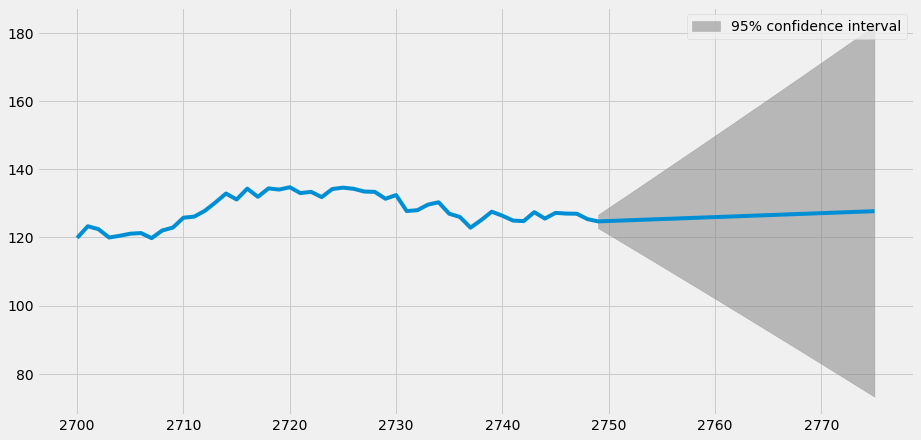

In [1248]:
_ = results.plot_predict(2700,2748+27)

In [1249]:
prediction.values

array([124.72379631, 124.83768491, 124.95166585, 125.06573923,
       125.17990511, 125.29416357, 125.40851468, 125.52295852,
       125.63749516, 125.75212469, 125.86684717, 125.98166268,
       126.09657129, 126.21157309, 126.32666814, 126.44185653,
       126.55713832, 126.6725136 , 126.78798243, 126.90354491,
       127.01920109, 127.13495106, 127.25079489, 127.36673267,
       127.48276446, 127.59889034, 127.71511039])

In [1250]:
new = test.to_frame()
new['predicted'] = prediction.values

In [1251]:
test.head()

date
2021-06-01    124.28
2021-06-02    125.06
2021-06-03    123.54
2021-06-04    125.89
2021-06-07    125.90
Name: AAPL, dtype: float64

In [1252]:
r2_score(new['AAPL'].values, new['predicted'].values)

-0.7427030977199409

In [1253]:
LR_R2 = r2_score(new['AAPL'].values, new['predicted'].values)
LR_RMSE = np.sqrt(mean_squared_error(new['AAPL'].values, new['predicted'].values))
LR_MAPE = mean_absolute_percentage_error(new['AAPL'].values, new['predicted'].values)

print(f'RMSE : {LR_RMSE}')
print(f'R2 : {LR_R2}')
print(f'MAPE : {LR_MAPE}')

RMSE : 7.673165105240683
R2 : -0.7427030977199409
MAPE : 0.04398642842957195


<AxesSubplot:xlabel='date'>

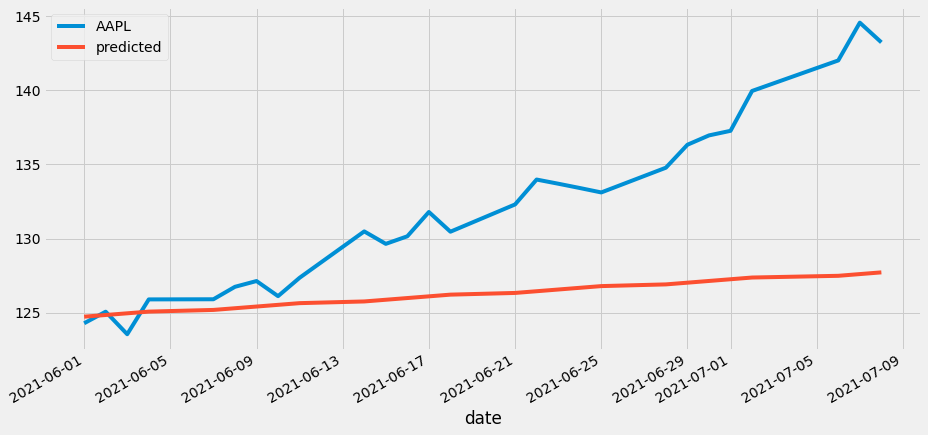

In [1254]:
new.plot()

# 11. Scores with Benchmark Model

In [1255]:
metrics_df['LR'] = [LR_RMSE, LR_R2, LR_MAPE]

In [1256]:
metrics_df.T

RMSE        R2      MAPE
fb_1      8.624225 -3.745444  0.063526
fb_2      6.092310 -1.368103  0.046379
fb_3      2.533085  0.590611  0.018307
ARIMA_1   3.531296 -2.707079  0.023564
ARIMA_2   6.030342 -3.529083  0.045235
ARIMA_3   6.635800 -1.809463  0.041156
ARIMA_4   5.835365 -1.172565  0.035751
VAR_1     0.009686 -0.062573  2.260753
LSTM_1   40.996503 -1.533111  0.334533
LSTM_2   68.123026 -6.014925  0.517857
LR        7.673165 -0.742703  0.043986

In [1239]:
metrics_df.loc['MAPE'].sort_values()

fb_3       0.018307
ARIMA_1    0.023564
ARIMA_4    0.035751
ARIMA_3    0.041156
LR         0.043986
ARIMA_2    0.045235
fb_2       0.046379
fb_1       0.063526
LSTM_1     0.334533
LSTM_2     0.517857
VAR_1      2.260753
Name: MAPE, dtype: float64

In [1240]:
metrics_df.loc['RMSE'].sort_values()

VAR_1       0.009686
fb_3        2.533085
ARIMA_1     3.531296
ARIMA_4     5.835365
ARIMA_2     6.030342
fb_2        6.092310
ARIMA_3     6.635800
LR          7.673165
fb_1        8.624225
LSTM_1     40.996503
LSTM_2     68.123026
Name: RMSE, dtype: float64

In [1218]:
df_all

TSLA     AMZN        NFLX        NVDA        AAPL         GME
date                                                                        
2010-06-29    4.778   108.61   16.082841    9.631125    7.866247   12.307800
2010-06-30    4.766   109.26   15.521413    9.382995    7.723766   12.623557
2010-07-01    4.392   110.96   15.665699    9.539225    7.630109   12.811668
2010-07-02    3.840   109.14   15.297128    9.419755    7.582820   12.274209
2010-07-06    3.222   110.06   15.324270    9.318665    7.634715   12.361546
...             ...      ...         ...         ...         ...         ...
2021-07-01  677.920  3432.97  533.540000  808.480000  137.270000  204.360000
2021-07-02  678.900  3510.98  533.980000  819.480000  139.960000  202.830000
2021-07-06  659.580  3675.74  541.640000  827.940000  142.020000  199.560000
2021-07-07  644.650  3696.58  535.960000  814.870000  144.570000  190.660000
2021-07-08  652.810  3731.41  530.760000  796.110000  143.240000  191.380000

[2776 rows x 6 columns]

In [833]:
df_all_p.loc['2010-06-29':]

CCL        MRO    UAL        SLB        OKE       FARM  \
date                                                                       
2010-06-29  22.587764  15.675627  19.99  41.777201  10.683613  14.615674   
2010-06-30  22.662707  15.535711  20.56  41.974407  10.573599  14.802049   
2010-07-01  23.464595  15.415783  20.72  41.913728  10.397576  14.439109   
2010-07-02  22.947490  15.405789  18.59  41.686184  10.338902  14.311590   
2010-07-06  22.850064  15.495735  18.64  42.126103  10.475809  14.488155   
...               ...        ...    ...        ...        ...        ...   
2021-07-01  26.360000  14.170000  53.08  33.070000  56.930000  12.650000   
2021-07-02  26.060000  13.850000  52.77  32.790000  57.390000  12.490000   
2021-07-06  25.020000  13.210000  51.44  31.170000  56.490000  11.720000   
2021-07-07  24.080000  12.930000  50.30  30.680000  55.440000  10.720000   
2021-07-08  23.720000  12.950000  49.66  30.530000  55.380000  10.190000   

                   GLBS  
date                     
2010-06-29  6022.279647  
2010-06-30  6022.279647  
2010-07-01  6022.279647  
2010-07-02  6022.279647  
2010-07-06  6022.279647  
...                 ...  
2021-07-01     3.860000  
2021-07-02     3.790000  
2021-07-06     3.680000  
2021-07-07     3.490000  
2021-07-08     3.390000  

[2776 rows x 7 columns]